![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (100+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [The Performance Module](#the-performance-module)
6. [The Risk Module](#the-risk-module)
7. [The Technicals Module](#the-technicals-module)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Toolkit-Module) to find all the available functionality.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2005-01-01"
)

Let's start off by collecting some historical data. Here, there are multiple periods that can be selected. This can be 'daily', 'weekly', 'monthly', 'quarterly', or 'yearly'. The default is 'daily'. If you provide an API key it will automatically collect data via FinancialModelingPrep, otherwise it defaults to Yahoo Finance. You can change this behaviour by changing the `historic_source` parameter in the toolkit initialization.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.46it/s]


Open                                  High                        \
             AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT   GOOGL   AMZN   
date                                                                            
2005-01-03 1.1568   26.8   4.94   2.25    121.56 1.1627  26.95     5.1   2.27   
2005-01-04 1.1393  26.87   5.04   2.13    120.46 1.1691   27.1    5.08   2.16   
2005-01-05 1.1491  26.84   4.84   2.08    118.74 1.1652   27.1    4.93   2.14   
2005-01-06 1.1551  26.85   4.88   2.09    118.44 1.1591  27.06     4.9   2.11   
2005-01-07 1.1607  26.82   4.77   2.07    118.97 1.2434  26.89    4.86   2.13   
...           ...    ...    ...    ...       ...    ...    ...     ...    ...   
2023-10-30 169.02 333.41 123.21 129.72    413.56 171.17 339.45  127.78 133.47   
2023-10-31 169.35 338.85 125.06 132.75    416.18  170.9  339.0  125.37 133.57   
2023-11-01  171.0 339.79 124.07 133.96     419.2 174.23 347.42  126.49 137.35   
2023-11-02 175.52 347.24 128.42 138.73    426.58 177.78 348.83  128.98 138.81   
2023-11-03 174.24 349.63 128.02 138.99    433.14 176.82 354.39 129.525 139.49   

                      ... Excess Volatility                                 \
           Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
date                  ...                                                    
2005-01-03    121.76  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2005-01-04    120.54  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2005-01-05    119.25  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2005-01-06    119.15  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2005-01-07    119.23  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
...              ...  ...               ...    ...    ...    ...       ...   
2023-10-30    416.68  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2023-10-31    418.53  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2023-11-01     423.5  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2023-11-02   430.915  ...            0.0233 0.0207 0.0221 0.0267    0.0166   
2023-11-03    436.29  ...            0.0233 0.0207 0.0221 0.0267    0.0166   

           Cumulative Return                                    
                        AAPL    MSFT   GOOGL    AMZN Benchmark  
date                                                            
2005-01-03               1.0     1.0     1.0     1.0       1.0  
2005-01-04            1.0103  1.0037  0.9606  0.9462    0.9879  
2005-01-05            1.0191  1.0016  0.9546  0.9372    0.9809  
2005-01-06            1.0199  1.0005   0.931  0.9193    0.9859  
2005-01-07            1.0946  0.9973  0.9566  0.9507    0.9845  
...                      ...     ...     ...     ...       ...  
2023-10-30          177.5167 18.0091 24.5483 59.5112    4.9499  
2023-10-31          178.0171 18.0518 24.4734 59.6816    4.9809  
2023-11-01          181.3529 18.4768 24.9408  61.435    5.0341  
2023-11-02          185.1057 18.5969  25.146 61.9148    5.1305  
2023-11-03          184.1466 18.8361 25.4635 62.1525    5.1773  

[4743 rows x 60 columns]

Open                                   High                        \
        AAPL   MSFT  GOOGL   AMZN Benchmark    AAPL   MSFT   GOOGL   AMZN   
Date                                                                        
2005  2.5325  26.15  10.44   2.39     124.8  2.5868  26.31   10.47   2.41   
2006  2.9982  29.86  11.56    2.0    142.06    3.05  30.15   11.62   2.01   
2007   7.125   35.9  17.48   4.69     147.1  7.1607  35.99   17.58   4.72   
2008  3.0704  19.31   7.61   2.54     89.08  3.1336  19.68    7.78   2.58   
2009  7.6118  30.98  15.63   6.85    112.77  7.6196  30.99   15.65   6.86   
2010 11.5339   27.8  14.93    9.1    125.53 11.5529  27.92   14.98   9.12   
2011 14.4111   26.0  16.07   8.67    126.02   14.51  26.12   16.19   8.76   
2012 18.2332  26.59  17.52  12.19    139.66 19.1214  26.77   17.78  12.62   
2013 19.7918   37.4  27.83  19.73    184.07 20.0457  37.58   28.05  19.94   
2014  28.205  46.73  26.89  15.58    207.99 28.2825  47.44   26.92  15.65   
2015 26.7525  56.04  39.39   34.3    205.13 26.7575  56.19   39.42  34.39   
2016 29.1625  62.96  40.16  38.32    224.73    29.3  62.99   40.16  38.37   
2017   42.63  85.63  52.77  59.12    268.53 42.6475  86.05    52.9   59.2   
2018 39.6325 101.29  52.89  75.54    249.56   39.84  102.4   53.15  76.04   
2019 72.4825 156.77  66.79   92.1    320.53   73.42 157.77   67.03  92.66   
2020  134.08  221.7  86.86 163.75    371.78  134.74  223.0   87.88 164.15   
2021 178.085 338.51 146.05 168.96    475.64  179.23 339.36   146.7 169.35   
2022  128.41 238.21  86.98  83.12    380.64  129.95 239.96    88.3  84.05   
2023  174.24 349.63 128.02 138.99    433.14  176.82 354.39 129.525 139.49   

                ... Excess Volatility                                 \
     Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
Date            ...                                                    
2005    125.06  ...            0.3944 0.1447 0.3296 0.3558    0.1081   
2006    142.54  ...            0.3876 0.2132 0.3419 0.4045    0.1091   
2007    147.61  ...             0.381 0.2356  0.248 0.5217    0.1647   
2008     90.97  ...            0.5852 0.4886  0.557  0.665    0.4189   
2009     112.8  ...            0.3432 0.3727 0.3082 0.5297    0.2686   
2010    125.87  ...            0.2781 0.2314 0.2944 0.3391     0.194   
2011    126.33  ...            0.2777 0.2546  0.313 0.3887    0.2471   
2012    142.56  ...            0.2919 0.2075 0.2333 0.3177    0.1298   
2013    184.69  ...            0.2874 0.2615 0.2299  0.275    0.1296   
2014    208.19  ...            0.2195 0.1924 0.2136 0.3244     0.117   
2015    205.89  ...              0.27 0.2829 0.2884 0.3382    0.1561   
2016    224.83  ...              0.24 0.2344 0.2104 0.3067    0.1384   
2017    268.55  ...            0.1746 0.1483  0.153  0.209    0.0685   
2018    250.19  ...            0.2898 0.2849 0.2849 0.3641    0.1734   
2019    322.13  ...              0.27 0.2046  0.244 0.2327    0.1374   
2020    374.66  ...            0.4708  0.441 0.3874 0.3893    0.3391   
2021    476.86  ...            0.2514 0.2127 0.2467 0.2414    0.1321   
2022    382.58  ...            0.3773 0.3688 0.4048 0.5207    0.2659   
2023    436.29  ...            0.2329 0.2761 0.3325 0.3617     0.159   

     Cumulative Return                                    
                  AAPL    MSFT   GOOGL    AMZN Benchmark  
Date                                                      
2005               1.0     1.0     1.0     1.0       1.0  
2006            1.1789  1.1586  1.1098  0.8347    1.1585  
2007            2.7523  1.4002  1.6667  1.9619    1.2181  
2008            1.1881  0.7789  0.7418  1.0847    0.7699  
2009            2.9312  1.2497  1.4952  2.8517    0.9727  
2010            4.4862  1.1677  1.4316  3.8136    1.1193  
2011             5.633  1.1154  1.5568  3.6653    1.1405  
2012            7.4679  1.1802  1.7052  5.3136    1.3229  
2013            8.0688  1.7028  2.7023  8.4492    1.7502  
2014            11.3

<Axes: title={'center': 'Cumulative Returns of Apple, Microsoft, Google and Amazon'}, xlabel='Date'>

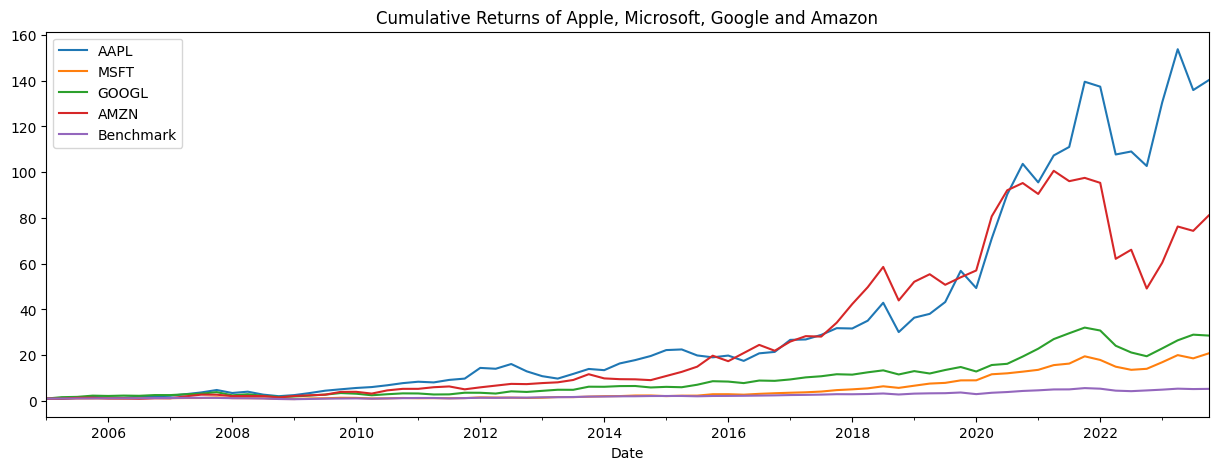

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data())

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Cumulative Returns
companies.get_historical_data(period="quarterly")["Cumulative Return"].plot(
    figsize=(15, 5), title="Cumulative Returns of Apple, Microsoft, Google and Amazon"
)

It can be of help to understand some general statistics about this data as well, this can be done with `get_historical_statistics`. This is especially relevant when looking at products that are denoted in different currencies.

In [4]:
companies.get_historical_statistics()

,AAPL,MSFT,GOOGL,AMZN
Currency,USD,USD,USD,USD
Symbol,AAPL,MSFT,GOOGL,AMZN
Exchange Name,NMS,NMS,NMS,NMS
Instrument Type,EQUITY,EQUITY,EQUITY,EQUITY
First Trade Date,1980-12-12,1986-03-13,2004-08-19,1997-05-15
Regular Market Time,2023-11-03,2023-11-03,2023-11-03,2023-11-03
GMT Offset,-14400,-14400,-14400,-14400
Timezone,EDT,EDT,EDT,EDT
Exchange Timezone Name,America/New_York,America/New_York,America/New_York,America/New_York


Then on to the financial statements in which for any period, based on how this is defined in the Toolkit initialization, can be collected. This can also be quarterly financial statements if the `quarterly=True` parameter is added to the Toolkit initialization.

In [5]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

Obtaining balance data: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


date                                          2005          2006  \
AAPL Cash and Cash Equivalents        3491000000.0  6392000000.0   
     Short Term Investments           4770000000.0  3718000000.0   
     Cash and Short Term Investments  8261000000.0 10110000000.0   
     Accounts Receivable              1312000000.0  2845000000.0   
     Inventory                         165000000.0   270000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    70815000000.0 69597000000.0   
     Total Investments               32900000000.0 27447000000.0   
     Total Debt                                0.0           0.0   
     Net Debt                        -4851000000.0 -6714000000.0   

date                                          2007           2008  \
AAPL Cash and Cash Equivalents        9352000000.0  11875000000.0   
     Short Term Investments           6034000000.0  12615000000.0   
     Cash and Short Term Investments 15386000000.0  24490000000.0   
     Accounts Receivable              4029000000.0   2422000000.0   
     Inventory                         346000000.0    509000000.0   
...                                            ...            ...   
MSFT Minority Interest                         0.0            0.0   
     Total Liabilities and Equity    63171000000.0  72793000000.0   
     Total Investments               17300000000.0  19911000000.0   
     Total Debt                                0.0            0.0   
     Net Debt                        -6111000000.0 -10339000000.0   

date                                          2009          2010  \
AAPL Cash and Cash Equivalents        5263000000.0 11261000000.0   
     Short Term Investments          18201000000.0 14359000000.0   
     Cash and Short Term Investments 23464000000.0 25620000000.0   
     Accounts Receivable              3361000000.0  9924000000.0   
     Inventory                         455000000.0  1051000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    77888000000.0 86113000000.0   
     Total Investments               30304000000.0 39037000000.0   
     Total Debt                       5746000000.0  5939000000.0   
     Net Debt                         -330000000.0   434000000.0   

date                                           2011           2012  \
AAPL Cash and Cash Equivalents         9815000000.0  10746000000.0   
     Short Term Investments           16137000000.0  18383000000.0   
     Cash and Short Term Investments  25952000000.0  29129000000.0   
     Accounts Receivable              11717000000.0  18692000000.0   
     Inventory                          776000000.0    791000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    108704000000.0 121271000000.0   
     Total Investments                54027000000.0  65878000000.0   
     Total Debt                       11921000000.0  11944000000.0   
     Net Debt                          2311000000.0   5006000000.0   

date                                           2013           2014  \
AAPL Cash and Cash Equivalents        14259000000.0  13844000000.0   
     Short Term Investments           26287000000.0  11233000000.0   
     Cash and Short Term Investments  40546000000.0  25077000000.0   
     Accounts Receivable              20641000000.0  27219000000.0   
     Inventory                         1764000000.0   2111000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    142431000000.0 172384000000.0   
     Total Investments                84062000000.0  91637000000.0

In [6]:
# Obtain the income statements from each company
companies.get_income_statement()

Obtaining income data: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


date                                            2005          2006  \
AAPL Revenue                           13931000000.0 19315000000.0   
     Cost of Goods Sold                 9888000000.0 13717000000.0   
     Gross Profit                       4043000000.0  5598000000.0   
     Gross Profit Ratio                       0.2902        0.2898   
     Research and Development Expenses   534000000.0   712000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                          0.308        0.2845   
     EPS                                        1.13          1.21   
     EPS Diluted                                1.12           1.2   
     Weighted Average Shares           10839000000.0 10438000000.0   
     Weighted Average Shares Diluted   10906000000.0 10531000000.0   

date                                            2007          2008  \
AAPL Revenue                           24006000000.0 32479000000.0   
     Cost of Goods Sold                15852000000.0 21334000000.0   
     Gross Profit                       8154000000.0 11145000000.0   
     Gross Profit Ratio                       0.3397        0.3431   
     Research and Development Expenses   782000000.0  1109000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2751        0.2926   
     EPS                                        1.44           1.9   
     EPS Diluted                                1.42          1.87   
     Weighted Average Shares            9742000000.0  9328000000.0   
     Weighted Average Shares Diluted    9886000000.0  9470000000.0   

date                                            2009          2010  \
AAPL Revenue                           36537000000.0 65225000000.0   
     Cost of Goods Sold                23397000000.0 39541000000.0   
     Gross Profit                      13140000000.0 25684000000.0   
     Gross Profit Ratio                       0.3596        0.3938   
     Research and Development Expenses  1333000000.0  1782000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2493        0.3002   
     EPS                                        1.63          2.13   
     EPS Diluted                                1.62           2.1   
     Weighted Average Shares            8945000000.0  8813000000.0   
     Weighted Average Shares Diluted    8996000000.0  8927000000.0   

date                                             2011           2012  \
AAPL Revenue                           108249000000.0 156508000000.0   
     Cost of Goods Sold                 64431000000.0  87846000000.0   
     Gross Profit                       43818000000.0  68662000000.0   
     Gross Profit Ratio                        0.4048         0.4387   
     Research and Development Expenses   2429000000.0   3381000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                           0.331         0.2303   
     EPS                                         2.73           2.02   
     EPS Diluted                                 2.69            2.0   
     Weighted Average Shares             8490000000.0   8396000000.0   
     Weighted Average Shares Diluted     8593000000.0   8506000000.0   

date                                             2013           2014  \
AAPL Revenue                           170910000000.0 182795000000.0   
     Cost of Goods Sold                106606000000.0 112258000000.0   
     Gross Profit                       64304000000.0  70537000000.0   
     Gross Profit Ratio                        0.3762         0.3859   
     Research and Development Expenses   4475000000.0   6041000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                          0.2808         0.2542   
     EPS                            

In [7]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

Obtaining cashflow data: 100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


date                                        2005          2006          2007  \
AAPL Net Income                     1335000000.0  1989000000.0  3496000000.0   
     Depreciation and Amortization   179000000.0   225000000.0   317000000.0   
     Deferred Income Tax             505000000.0    53000000.0    78000000.0   
     Stock Based Compensation         42000000.0   163000000.0   242000000.0   
     Change in Working Capital       465000000.0  -221000000.0  1325000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             4851000000.0  6714000000.0  6111000000.0   
     Cash Beginning of Period      14304000000.0  4851000000.0  6714000000.0   
     Operating Cash Flow           16605000000.0 14404000000.0 17796000000.0   
     Capital Expenditure            -812000000.0 -1578000000.0 -2264000000.0   
     Free Cash Flow                15793000000.0 12826000000.0 15532000000.0   

date                                        2008          2009          2010  \
AAPL Net Income                     4834000000.0  5704000000.0 14013000000.0   
     Depreciation and Amortization   473000000.0   703000000.0  1027000000.0   
     Deferred Income Tax            -368000000.0  -519000000.0  1440000000.0   
     Stock Based Compensation        516000000.0   710000000.0   879000000.0   
     Change in Working Capital      4119000000.0  3535000000.0  1212000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period            10339000000.0  6076000000.0  5505000000.0   
     Cash Beginning of Period       6111000000.0 10339000000.0  6076000000.0   
     Operating Cash Flow           21612000000.0 19037000000.0 24073000000.0   
     Capital Expenditure           -3182000000.0 -3119000000.0 -1977000000.0   
     Free Cash Flow                18430000000.0 15918000000.0 22096000000.0   

date                                        2011          2012          2013  \
AAPL Net Income                    25922000000.0 41733000000.0 37037000000.0   
     Depreciation and Amortization  1814000000.0  3277000000.0  6757000000.0   
     Deferred Income Tax            2868000000.0  4405000000.0  1141000000.0   
     Stock Based Compensation       1168000000.0  1740000000.0  2253000000.0   
     Change in Working Capital      5757000000.0  -299000000.0  6478000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             9610000000.0  6938000000.0  3804000000.0   
     Cash Beginning of Period       5505000000.0  9610000000.0  6938000000.0   
     Operating Cash Flow           26994000000.0 31626000000.0 28833000000.0   
     Capital Expenditure           -2355000000.0 -2305000000.0 -4257000000.0   
     Free Cash Flow                24639000000.0 29321000000.0 24576000000.0   

date                                        2014          2015          2016  \
AAPL Net Income                    39510000000.0 53394000000.0 45687000000.0   
     Depreciation and Amortization  7946000000.0 11257000000.0 10505000000.0   
     Deferred Income Tax            2347000000.0  1382000000.0  4938000000.0   
     Stock Based Compensation       2863000000.0  3586000000.0  4210000000.0   
     Change in Working Capital      7047000000.0 11647000000.0   484000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             8669000000.0  5595000000.0  6510000000.0   
     Cash Beginning of Period       3804000000.0  8669000000.0  5595000000.0   
     Operating Cash Flow           32231000000.0 29080000000.0 33325000000.0   
     Capital Expenditure           -5485000000.0 -5944000000.0 -8343000000.0   
     Free Cash Flow                26746000000.0 23136000000.0 24982000000.0   

date                                        2017           2018  \
AAPL Net Income                    48351000000.0  59531000000.0   
     Depreciation and 

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Cash and Cash Equivalents,1013000000.0,1022000000.0,2539000000.0,2769000000.0,3444000000.0,3777000000.0,5269000000.0,8084000000.0,8658000000.0,14557000000.0,15890000000.0,19334000000.0,20522000000.0,31750000000.0,36092000000.0,42122000000.0,36220000000.0,53888000000.0,NaN
Short Term Investments,987000000.0,997000000.0,573000000.0,958000000.0,2922000000.0,4985000000.0,4307000000.0,3364000000.0,3789000000.0,2859000000.0,3918000000.0,6647000000.0,10464000000.0,9500000000.0,18929000000.0,42274000000.0,59829000000.0,16138000000.0,NaN
Cash and Short Term Investments,2000000000.0,2019000000.0,3112000000.0,3727000000.0,6366000000.0,8762000000.0,9576000000.0,11448000000.0,12447000000.0,17416000000.0,19808000000.0,25981000000.0,30986000000.0,41250000000.0,55021000000.0,84396000000.0,96049000000.0,70026000000.0,NaN
Accounts Receivable,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
Inventory,566000000.0,877000000.0,1200000000.0,1399000000.0,2171000000.0,3202000000.0,4992000000.0,6031000000.0,7411000000.0,8299000000.0,10243000000.0,11461000000.0,16047000000.0,17174000000.0,20497000000.0,23795000000.0,32640000000.0,34405000000.0,NaN


date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,1312000000.0,2845000000.0,4029000000.0,2422000000.0,3361000000.0,9924000000.0,11717000000.0,18692000000.0,20641000000.0,27219000000.0,30343000000.0,29299000000.0,35673000000.0,48995000000.0,45804000000.0,37445000000.0,51506000000.0,60932000000.0,29508000000.0
AMZN,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
GOOGL,687976000.0,1322340000.0,2307774000.0,2642192000.0,3201715000.0,5002000000.0,6172000000.0,8585000000.0,9390000000.0,11556000000.0,13909000000.0,14232000000.0,18705000000.0,21193000000.0,27492000000.0,31384000000.0,40270000000.0,40258000000.0,NaN
MSFT,7180000000.0,9316000000.0,11338000000.0,13589000000.0,11192000000.0,13014000000.0,14987000000.0,15780000000.0,17486000000.0,19544000000.0,17908000000.0,18277000000.0,19792000000.0,26481000000.0,29524000000.0,32011000000.0,38043000000.0,44261000000.0,48688000000.0


<Axes: title={'center': 'Total Shareholder Equity in 2022'}>

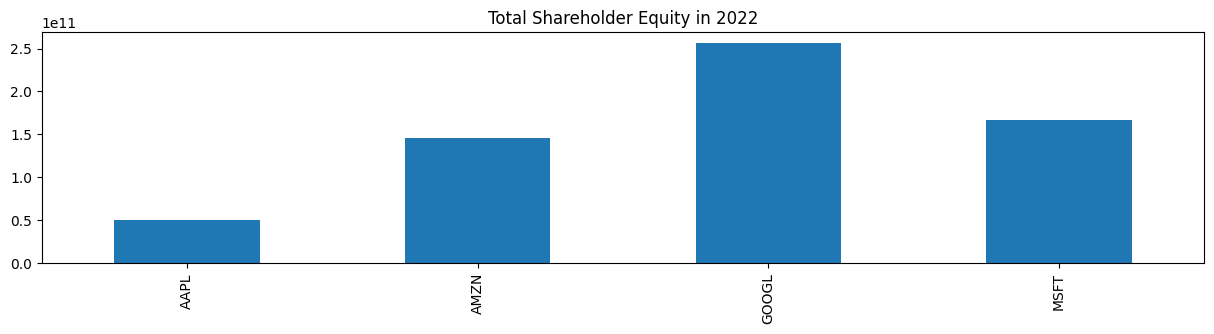

In [8]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2022
balance_sheet.loc[:, "Total Shareholder Equity", :]["2022"].plot.bar(
    figsize=(15, 3), title="Total Shareholder Equity in 2022"
)

For all of the financial statements, it is also possible to show the growth instead. E.g. if you are interested in revenue growth you can use the following:

In [9]:
companies.get_income_statement(growth=True)

date                                    2005    2006    2007    2008    2009  \
AAPL Revenue                             NaN  0.3865  0.2429   0.353  0.1249   
     Cost of Goods Sold                  NaN  0.3872  0.1556  0.3458  0.0967   
     Gross Profit                        NaN  0.3846  0.4566  0.3668   0.179   
     Gross Profit Ratio                  NaN -0.0014  0.1722    0.01  0.0481   
     Research and Development Expenses   NaN  0.3333  0.0983  0.4182   0.202   
...                                      ...     ...     ...     ...     ...   
MSFT Net Income Ratio                    NaN -0.0763  -0.033  0.0636  -0.148   
     EPS                                 NaN  0.0708  0.1901  0.3194 -0.1421   
     EPS Diluted                         NaN  0.0714  0.1833  0.3169 -0.1337   
     Weighted Average Shares             NaN  -0.037 -0.0667 -0.0425 -0.0411   
     Weighted Average Shares Diluted     NaN -0.0344 -0.0612 -0.0421 -0.0501   

date                                      2010    2011    2012    2013  \
AAPL Revenue                            0.7852  0.6596  0.4458   0.092   
     Cost of Goods Sold                   0.69  0.6295  0.3634  0.2136   
     Gross Profit                       0.9546   0.706   0.567 -0.0635   
     Gross Profit Ratio                 0.0951  0.0279  0.0837 -0.1425   
     Research and Development Expenses  0.3368  0.3631  0.3919  0.3236   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                   0.2042  0.1026 -0.3042  0.2193   
     EPS                                0.3067  0.2817 -0.2601  0.2921   
     EPS Diluted                        0.2963   0.281 -0.2565    0.29   
     Weighted Average Shares           -0.0148 -0.0367 -0.0111 -0.0025   
     Weighted Average Shares Diluted   -0.0077 -0.0374 -0.0101 -0.0042   

date                                      2014    2015    2016    2017  \
AAPL Revenue                            0.0695  0.2786 -0.0773   0.063   
     Cost of Goods Sold                  0.053  0.2479 -0.0622  0.0736   
     Gross Profit                       0.0969  0.3273    -0.1  0.0466   
     Gross Profit Ratio                 0.0258  0.0381 -0.0245 -0.0156   
     Research and Development Expenses  0.3499  0.3354  0.2452  0.1529   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.0947 -0.4874  0.5111  0.1971   
     EPS                                0.0192 -0.4398  0.4228  0.2925   
     EPS Diluted                        0.0194 -0.4373  0.4189  0.2905   
     Weighted Average Shares           -0.0091 -0.0147 -0.0308 -0.0226   
     Weighted Average Shares Diluted   -0.0084 -0.0173 -0.0292 -0.0226   

date                                      2018    2019    2020    2021  \
AAPL Revenue                            0.1586 -0.0204  0.0551  0.3326   
     Cost of Goods Sold                  0.161 -0.0121  0.0481  0.2561   
     Gross Profit                       0.1548 -0.0338  0.0667  0.4562   
     Gross Profit Ratio                -0.0034 -0.0136  0.0108  0.0929   
     Research and Development Expenses  0.2293  0.1392  0.1563  0.1686   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.3627  1.0759 -0.0071  0.1773   
     EPS                               -0.2153  1.3767  0.1389  0.3952   
     EPS Diluted                        -0.214  1.3756  0.1383  0.3976   
     Weighted Average Shares           -0.0059 -0.0035 -0.0082 -0.0083   
     Weighted Average Shares Diluted   -0.0049 -0.0053  -0.009 -0.0098   

date                                      2022    2023  
AAPL Revenue                            0.0779  -0.028  
     Cost of Goods Sold                 0.0496 -0.0421  
     Gross Profit                       0.1174 -0.0096  
     Gross Profit Ratio                 0.0366  0.0189  
     Research and Development Expenses  0.1979  0.1396  
...                           

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [10]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2005    2006    2007    2008  \
AAPL Revenue                         Lag 1   NaN  0.3865  0.2429   0.353   
                                     Lag 2   NaN     NaN  0.7232  0.6815   
                                     Lag 3   NaN     NaN     NaN  1.3314   
     Cost of Goods Sold              Lag 1   NaN  0.3872  0.1556  0.3458   
                                     Lag 2   NaN     NaN  0.6032  0.5553   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN -0.1012 -0.1063   
                                     Lag 3   NaN     NaN     NaN -0.1394   
     Weighted Average Shares Diluted Lag 1   NaN -0.0344 -0.0612 -0.0421   
                                     Lag 2   NaN     NaN -0.0935 -0.1008   
                                     Lag 3   NaN     NaN     NaN -0.1317   

date                                          2009    2010    2011    2012  \
AAPL Revenue                         Lag 1  0.1249  0.7852  0.6596  0.4458   
                                     Lag 2   0.522  1.0082  1.9627  1.3995   
                                     Lag 3  0.8916   1.717  2.3329  3.2835   
     Cost of Goods Sold              Lag 1  0.0967    0.69  0.6295  0.3634   
                                     Lag 2   0.476  0.8534  1.7538  1.2216   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0818 -0.0552 -0.0509 -0.0473   
                                     Lag 3  -0.143 -0.0954 -0.0898 -0.0614   
     Weighted Average Shares Diluted Lag 1 -0.0501 -0.0077 -0.0374 -0.0101   
                                     Lag 2   -0.09 -0.0573 -0.0448 -0.0472   
                                     Lag 3 -0.1458  -0.097 -0.0926 -0.0545   

date                                          2013    2014    2015    2016  \
AAPL Revenue                         Lag 1   0.092  0.0695  0.2786 -0.0773   
                                     Lag 2  0.5789   0.168  0.3675  0.1797   
                                     Lag 3  1.6203  0.6887  0.4933  0.2617   
     Cost of Goods Sold              Lag 1  0.2136   0.053  0.2479 -0.0622   
                                     Lag 2  0.6546  0.2779  0.3141  0.1703   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0135 -0.0116 -0.0236 -0.0451   
                                     Lag 3 -0.0497 -0.0225 -0.0261 -0.0537   
     Weighted Average Shares Diluted Lag 1 -0.0042 -0.0084 -0.0173 -0.0292   
                                     Lag 2 -0.0143 -0.0126 -0.0255  -0.046   
                                     Lag 3 -0.0512 -0.0226 -0.0296  -0.054   

date                                          2017    2018    2019    2020  \
AAPL Revenue                         Lag 1   0.063  0.1586 -0.0204  0.0551   
                                     Lag 2 -0.0192  0.2317   0.135  0.0336   
                                     Lag 3   0.254  0.1364  0.2065  0.1975   
     Cost of Goods Sold              Lag 1  0.0736   0.161 -0.0121  0.0481   
                                     Lag 2  0.0068  0.2465   0.147  0.0354   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0527 -0.0284 -0.0094 -0.0117   
                                     Lag 3 -0.0666 -0.0583 -0.0318 -0.0176   
     Weighted Average Shares Diluted Lag 1 -0.0226 -0.0049 -0.0053  -0.009   
                                     Lag 2 -0.0511 -0.0273 -0.0101 -0.0142   
                                     Lag 3 -0.0675 -0.0557 -0.0324  -0.019   

date                                          2021    2022    2023  
AAPL Revenue                         Lag 1  0.3326  0.0779  -0.028  
                                     Lag 2   0.406  0.4365  0.0478  
                                     Lag 3  0.3773  0.5156  0.3962  


It is also possible to get trailing results. E.g. the TTM Revenues can be acquired by setting trailing to 4 (quarters). Note that this does not lead to meaningful results when using yearly data and therefore this image is for illustrative purposes only. Set `quarterly=True` in the Toolkit initialization to use quarterly data.

<Axes: title={'center': '12-Month Trailing (TTM) Revenue for Apple, Microsoft, Google and Amazon'}, xlabel='date'>

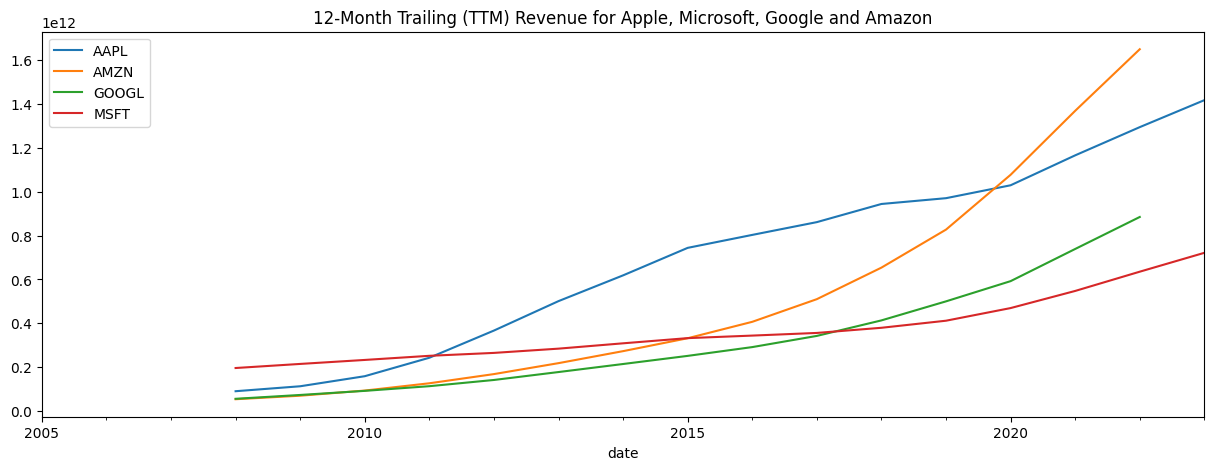

In [11]:
companies.get_income_statement(trailing=4).loc[:, "Revenue", :].T.plot(
    figsize=(15, 5),
    title="12-Month Trailing (TTM) Revenue for Apple, Microsoft, Google and Amazon",
)

It is possible to delve deeper with `get_revenue_product_segmentation` and `get_revenue_geographic_segmentation`. Do note that this is a Professional/Enterprise feature.

In [12]:
companies.get_revenue_product_segmentation()

Obtaining product segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


2010         2011         2012  \
AAPL Accessories                    0.0          0.0          0.0   
     Apple Ipad                     0.0          0.0          0.0   
     Apple Iphone                   0.0          0.0          0.0   
     Apple Mac                      0.0          0.0          0.0   
     Desktops                       0.0 6439000000.0 6040000000.0   
...                                 ...          ...          ...   
AMZN Physical Stores                NaN          0.0          0.0   
     Retail Products                NaN          0.0          0.0   
     Retail Subscription Services   NaN          0.0          0.0   
     Subscription Services          NaN          0.0          0.0   
     Third-Party Seller Services    NaN          0.0          0.0   

                                           2013           2014           2015  \
AAPL Accessories                   5706000000.0   6093000000.0            0.0   
     Apple Ipad                   31980000000.0  30283000000.0  23227000000.0   
     Apple Iphone                 91279000000.0 101991000000.0 155041000000.0   
     Apple Mac                    21483000000.0  24079000000.0  25471000000.0   
     Desktops                               0.0            0.0            0.0   
...                                         ...            ...            ...   
AMZN Physical Stores                        0.0            0.0            0.0   
     Retail Products                        0.0            0.0            0.0   
     Retail Subscription Services           0.0            0.0            0.0   
     Subscription Services                  0.0            0.0            0.0   
     Third-Party Seller Services            0.0            0.0            0.0   

                                            2016          2017          2018  \
AAPL Accessories                             0.0           0.0           0.0   
     Apple Ipad                    20628000000.0           0.0           0.0   
     Apple Iphone                 136700000000.0           0.0           0.0   
     Apple Mac                     22831000000.0           0.0           0.0   
     Desktops                                0.0           0.0           0.0   
...                                          ...           ...           ...   
AMZN Physical Stores                         0.0  5798000000.0 17224000000.0   
     Retail Products               91431000000.0           0.0           0.0   
     Retail Subscription Services   6394000000.0           0.0           0.0   
     Subscription Services                   0.0  9721000000.0 14168000000.0   
     Third-Party Seller Services   22993000000.0 31881000000.0 42745000000.0   

                                           2019          2020           2021  \
AAPL Accessories                            0.0           0.0            0.0   
     Apple Ipad                             0.0           0.0            0.0   
     Apple Iphone                           0.0           0.0            0.0   
     Apple Mac                              0.0           0.0            0.0   
     Desktops                               0.0           0.0            0.0   
...                                         ...           ...            ...   
AMZN Physical Stores              17192000000.0 16227000000.0  17075000000.0   
     Retail Products                        0.0           0.0            0.0   
     Retail Subscription Services           0.0           0.0            0.0   
     Subscription Services        19210000000.0 25207000000.0  31768000000.0   
     Third-Party Seller Services  53762000000.0 80461000000.0 103366000000.0   

                                            2022  2023  
AAPL Accessories                             0.0   0.0  
     Apple Ipad                              0.0   0.0  
     Apple Iphone                            0.0   0.0  
     Apple Mac                               0.0   0.0  
     Desktops             

In [13]:
companies.get_revenue_geographic_segmentation()

Obtaining geographic segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


2010          2011  \
AAPL  Americas                         24498000000.0 38315000000.0   
      Asia Pacific                      8256000000.0 22592000000.0   
      China                                      0.0           0.0   
      Europe                           18692000000.0 27778000000.0   
      Japan                                      0.0  5437000000.0   
      Other Countries                            0.0           0.0   
      United States                              0.0           0.0   
MSFT  Non-Us                                     0.0           0.0   
      Other Countries                            0.0           0.0   
      Unallocated And Other              597000000.0   828000000.0   
      United States                              0.0           0.0   
GOOGL Americas Excluding United States           NaN           NaN   
      Asia Pacific                               NaN           NaN   
      Emea                                       NaN           NaN   
      Rest Of The World                          NaN           NaN   
      United States                              NaN           NaN   
AMZN  Germany                                    NaN           NaN   
      Japan                                      NaN           NaN   
      Non-Us                                     NaN           NaN   
      Rest Of World                              NaN           NaN   
      United States                              NaN           NaN   

                                                2012          2013  \
AAPL  Americas                                   0.0           0.0   
      Asia Pacific                               0.0           0.0   
      China                            22797000000.0 25946000000.0   
      Europe                                     0.0           0.0   
      Japan                                      0.0           0.0   
      Other Countries                  72762000000.0 78767000000.0   
      United States                    60949000000.0 66197000000.0   
MSFT  Non-Us                                     NaN           0.0   
      Other Countries                            NaN 36505000000.0   
      Unallocated And Other                      NaN           0.0   
      United States                              NaN 41344000000.0   
GOOGL Americas Excluding United States           NaN           NaN   
      Asia Pacific                               NaN           NaN   
      Emea                                       NaN           NaN   
      Rest Of The World                          NaN           NaN   
      United States                              NaN           NaN   
AMZN  Germany                           8732000000.0 10535000000.0   
      Japan                             7800000000.0  7639000000.0   
      Non-Us                                     0.0           0.0   
      Rest Of World                              0.0           0.0   
      United States                              0.0           0.0   

                                                2014          2015  \
AAPL  Americas                                   0.0           0.0   
      Asia Pacific                               0.0           0.0   
      China                            30638000000.0 56547000000.0   
      Europe                                     0.0           0.0   
      Japan                                      0.0           0.0   
      Other Countries                  83248000000.0 95436000000.0   
      United States                    68909000000.0 81732000000.0   
MSFT  Non-Us                                     0.0 50639000000.0   
      Other Countries                  43359000000.0           0.0   
      Unallocated And Other                      0.0           0.0   
      United States                    43474000000.0 42941000000.0   
GOOGL Americas Excluding United States           NaN           0.0   
      Asia Pacific                               NaN    

Not only past observations are observable, with `get_analyst_estimates` you can also get the analyst estimates for the future and see the earnings calendar with `get_earnings_calendar`

In [14]:
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 4/4 [00:00<00:00,  9.41it/s]


date                                        2005          2006          2007  \
AAPL Estimated Revenue Low         13626659998.0 16598138571.0 18693939340.0   
     Estimated Revenue High        20439989997.0 24897207857.0 28040909010.0   
     Estimated Revenue Average     17033324998.0 20747673214.0 23367424175.0   
     Estimated EBITDA Low           1741024242.0  3200560000.0  4015137390.0   
     Estimated EBITDA High          2611536363.0  4800840000.0  6022706085.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1089289766.0  1323300865.0  1770191918.0   
     Estimated EPS Average                  0.04         0.015         0.055   
     Estimated EPS High                     0.05          0.02          0.06   
     Estimated EPS Low                      0.03          0.01          0.05   
     Number of Analysts                     19.0          19.0          12.0   

date                                        2008          2009          2010  \
AAPL Estimated Revenue Low         26765317646.0 33020178102.0 51133805598.0   
     Estimated Revenue High        40147976469.0 49530267154.0 76700708397.0   
     Estimated Revenue Average     33456647058.0 41275222628.0 63917256998.0   
     Estimated EBITDA Low           4898933332.0  7880186154.0 14640464486.0   
     Estimated EBITDA High          7348399998.0 11820279232.0 21960696730.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1886118461.0  2329935197.0  4695092398.0   
     Estimated EPS Average                  0.05         0.065         0.125   
     Estimated EPS High                     0.06          0.08          0.15   
     Estimated EPS Low                      0.04          0.05           0.1   
     Number of Analysts                     12.0           7.0           9.0   

date                                         2011           2012  \
AAPL Estimated Revenue Low          84668972076.0 128156865993.0   
     Estimated Revenue High        127003458115.0 192235298991.0   
     Estimated Revenue Average     105836215096.0 160196082492.0   
     Estimated EBITDA Low           27829630700.0  48165863290.0   
     Estimated EBITDA High          41744446050.0  72248794936.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average   7088709968.0  13180000000.0   
     Estimated EPS Average                   0.08           0.03   
     Estimated EPS High                       0.1           0.04   
     Estimated EPS Low                       0.06           0.02   
     Number of Analysts                      14.0           17.0   

date                                         2013           2014  \
AAPL Estimated Revenue Low         136071463843.0 142688813098.0   
     Estimated Revenue High        204107195765.0 214033219648.0   
     Estimated Revenue Average     170089329804.0 178361016373.0   
     Estimated EBITDA Low           45114743880.0  48311071150.0   
     Estimated EBITDA High          67672115819.0  72466606725.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average   5638539460.0   4310017547.0   
     Estimated EPS Average                   0.04         -0.015   
     Estimated EPS High                      0.06            0.0   
     Estimated EPS Low                       0.02          -0.03   
     Number of Analysts                      19.0           18.0   

date                                         2015           2016  \
AAPL Estimated Revenue Low         181139442550.0 172645878591.0   
     Estimated Revenue High        271709163826.0 258968817887.0   
     Estimated Revenue Average     226424303188.0 215807348239.0   
     Estimated EBITDA Low           65528314429.0  57835982111.0   
     Estimated EBITDA High          98292471646.0  86753973169.0   
...                                 

In [15]:
companies.get_earnings_calendar()

Obtaining earnings calendars: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


EPS  Estimated EPS        Revenue  Estimated Revenue  \
     date                                                                 
AAPL 2005-01-12 0.0126         0.0087   3490000000.0       2879249998.5   
     2005-04-13 0.0121         0.0087   3243000000.0      2675474997.75   
     2005-07-13 0.0133         0.0113   3520000000.0       2816000000.0   
     2005-10-11 0.0176         0.0172   3678000000.0       5792850000.0   
     2006-01-18   0.02         0.0187   5749000000.0       5749000000.0   
...                ...            ...            ...                ...   
AMZN 2022-10-27    0.2           0.22 127101000000.0                NaN   
     2023-02-02   0.21           0.15 149204000000.0     155150000000.0   
     2023-04-27   0.31           0.21 127358000000.0     124551000000.0   
     2023-08-03   0.65           0.35 134383000000.0     119573000000.0   
     2023-10-26   0.94           0.58 143083000000.0     133393000000.0   

                Fiscal Date Ending Time  
     date                                
AAPL 2005-01-12         2004-12-25  amc  
     2005-04-13         2005-03-26  amc  
     2005-07-13         2005-06-25  amc  
     2005-10-11         2005-09-24  amc  
     2006-01-18         2005-12-31  amc  
...                            ...  ...  
AMZN 2022-10-27         2022-09-30  amc  
     2023-02-02         2022-12-31  amc  
     2023-04-27         2023-03-31  amc  
     2023-08-03         2023-06-30  amc  
     2023-10-26         2023-09-30  amc  

[305 rows x 6 columns]

Not only Earnings, also Dividend Calendars can be viewed through `get_dividend_calendar`

In [16]:
companies.get_dividend_calendar()

Obtaining dividend calendars: 100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


No data found for the following tickers: GOOGL, AMZN


Adj Dividend  Dividend Record Date Payment Date  \
     date                                                          
AAPL 2012-08-09        0.0946      2.65  2012-08-13   2012-08-16   
     2012-11-07        0.0946      2.65  2012-11-12   2012-11-15   
     2013-02-07        0.0946      2.65  2013-02-11   2013-02-14   
     2013-05-09        0.1089      3.05  2013-05-13   2013-05-16   
     2013-08-08        0.1089      3.05  2013-08-12   2013-08-15   
...                       ...       ...         ...          ...   
MSFT 2022-08-17          0.62      0.62  2022-08-18   2022-09-08   
     2022-11-16          0.68      0.68  2022-11-17   2022-12-08   
     2023-02-15          0.68      0.68  2023-02-16   2023-03-09   
     2023-05-17          0.68      0.68  2023-05-18   2023-06-08   
     2023-08-16          0.68      0.68  2023-08-17   2023-09-14   

                Declaration Date  
     date                         
AAPL 2012-08-09       2012-07-24  
     2012-11-07       2012-10-25  
     2013-02-07       2013-01-23  
     2013-05-09       2013-04-23  
     2013-08-08       2013-07-23  
...                          ...  
MSFT 2022-08-17       2022-06-14  
     2022-11-16       2022-09-20  
     2023-02-15       2022-11-29  
     2023-05-17       2023-03-14  
     2023-08-16       2023-06-13  

[120 rows x 5 columns]

It is also possible to look into Environmental, Social and Governance (ESG) data through `get_esg_scores`

In [17]:
companies.get_esg_scores()

Obtaining ESG scores: 100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Environmental Score                   Social Score                    \
                    AAPL  MSFT GOOGL  AMZN         AAPL  MSFT GOOGL  AMZN   
date                                                                        
2005               67.69 74.03   NaN 53.35         46.7 61.05   NaN 57.51   
2006               67.88   NaN   NaN 52.78        46.73   NaN   NaN 57.86   
2007               65.66   NaN   NaN 52.06        46.24   NaN   NaN  56.6   
2008               67.01   NaN   NaN 52.35        48.85   NaN   NaN 55.88   
2009               66.85   NaN   NaN 48.72        47.68   NaN   NaN 55.36   
2010                67.1   NaN   NaN  48.1        48.28   NaN   NaN 55.09   
2011               65.49 75.44   NaN 47.79        48.06 60.32   NaN 54.66   
2012               64.47 74.91   NaN 47.92        48.05 59.68   NaN 55.33   
2013               64.58 73.77   NaN 48.16        48.19 59.86   NaN 55.71   
2014               66.48 73.52   NaN 49.21        48.59 59.64   NaN 57.21   
2015               66.37 73.67 76.87 47.96        48.21 57.75 58.25 57.67   
2016               67.53 74.64 76.09 47.76        48.08 59.63 58.89 57.61   
2017               67.33 74.01 75.36  48.1        47.77 58.18 57.85 58.03   
2018               67.06  73.9 72.97 48.43         47.1 58.61 57.17 57.74   
2019               67.43 74.77 73.85 49.12        46.73 59.84 57.56 58.08   
2020               72.83  73.4  69.4 49.38        52.18 58.18 54.64 58.47   
2021               72.93 73.56 76.24 50.14        51.62 58.83 55.91  58.9   
2022               72.39 73.03 75.83  50.0        54.17 58.66 54.53 59.14   
2023               72.79  72.6 76.51 49.57        55.23 58.74 55.52 59.05   

     Governance Score                   ESG Score                    
                 AAPL  MSFT GOOGL  AMZN      AAPL  MSFT GOOGL  AMZN  
date                                                                 
2005            60.09 61.92   NaN 53.51     58.16 65.67   NaN 54.79  
2006            60.15   NaN   NaN 53.49     58.25   NaN   NaN 54.71  
2007            59.32   NaN   NaN 53.59     57.07   NaN   NaN 54.08  
2008            60.75   NaN   NaN 53.07     58.87   NaN   NaN 53.77  
2009            61.84   NaN   NaN 53.35     58.79   NaN   NaN 52.47  
2010            62.38   NaN   NaN 53.15     59.25   NaN   NaN 52.12  
2011             61.3 62.99   NaN 53.53     58.29 66.25   NaN 51.99  
2012            61.48 62.87   NaN 53.89      58.0 65.82   NaN 52.38  
2013            61.54 64.08   NaN 53.95      58.1  65.9   NaN  52.6  
2014             61.7 63.91   NaN 55.18     58.93 65.69   NaN 53.87  
2015            61.35 61.94 60.99 54.64     58.64 64.45 65.37 53.42  
2016            61.73 63.55 60.63 54.13     59.11 65.94  65.2 53.17  
2017            61.81 61.91  59.5  54.4     58.97  64.7 64.24 53.51  
2018            61.26 61.46 59.05 54.31     58.47 64.65 63.06  53.5  
2019            61.02 63.07 59.15  54.3      58.4 65.89 63.52 53.83  
2020            62.05 61.05 56.79 53.18     62.35 64.21 60.28 53.68  
2021            62.23 61.84 60.69 53.16     62.26 64.74 64.28 54.07  
2022            65.05  61.4 60.76 53.53     63.87 64.37 63.71 54.22  
2023            65.73 61.88  60.8 52.78     64.59 64.41 64.28  53.8

When needing to work with treasury rates, `get_treasury_data` is excellent to obtain any range of treasury rates. These can be used to calculate excess returns and excess volatility as needed for performance metrics. The Toolkit parameter `risk_free_rate` also picks one of these rates as the risk free rate to use e.g. in Sharpe Ratio calculations.

In [18]:
companies.get_treasury_data()

Open                           High                         \
           13 Week 5 Year 10 Year 30 Year 13 Week 5 Year 10 Year 30 Year   
date                                                                       
2005-01-03   0.022 0.0365  0.0426  0.0486  0.0222 0.0366  0.0427  0.0487   
2005-01-04  0.0228 0.0362  0.0421  0.0481  0.0229 0.0373  0.0431   0.049   
2005-01-05   0.023 0.0373   0.043  0.0489   0.023 0.0374   0.043  0.0489   
2005-01-06  0.0227 0.0371  0.0429  0.0486  0.0227 0.0372   0.043  0.0487   
2005-01-07  0.0227 0.0368  0.0426  0.0484  0.0228 0.0375  0.0431  0.0486   
...            ...    ...     ...     ...     ...    ...     ...     ...   
2023-10-30   0.053 0.0482   0.049  0.0506  0.0531 0.0484  0.0492  0.0509   
2023-10-31  0.0532 0.0475  0.0481  0.0496  0.0532 0.0482  0.0488  0.0503   
2023-11-01  0.0532 0.0481  0.0489  0.0506  0.0532 0.0482   0.049  0.0508   
2023-11-02  0.0529 0.0462  0.0469  0.0487  0.0529 0.0466   0.047  0.0487   
2023-11-03  0.0526 0.0462  0.0464  0.0479  0.0526 0.0462  0.0464   0.048   

               Low         ...  Return         Volatility                 \
           13 Week 5 Year  ... 10 Year 30 Year    13 Week 5 Year 10 Year   
date                       ...                                             
2005-01-03   0.022 0.0361  ...     0.0  -0.001     0.4918 0.0367  0.0271   
2005-01-04  0.0228 0.0361  ...  0.0142  0.0129     0.4918 0.0367  0.0271   
2005-01-05  0.0228 0.0369  ...     0.0 -0.0066     0.4918 0.0367  0.0271   
2005-01-06  0.0227 0.0368  ... -0.0023  0.0014     0.4918 0.0367  0.0271   
2005-01-07  0.0227 0.0356  ...  0.0047 -0.0002     0.4918 0.0367  0.0271   
...            ...    ...  ...     ...     ...        ...    ...     ...   
2023-10-30   0.053  0.048  ...  0.0062  0.0024     0.4918 0.0367  0.0271   
2023-10-31  0.0532 0.0475  ...     0.0 -0.0026     0.4918 0.0367  0.0271   
2023-11-01  0.0526 0.0468  ... -0.0176 -0.0094     0.4918 0.0367  0.0271   
2023-11-02  0.0526 0.0456  ... -0.0251  -0.031     0.4918 0.0367  0.0271   
2023-11-03  0.0523 0.0443  ... -0.0238 -0.0143     0.4918 0.0367  0.0271   

                   Cumulative Return                         
           30 Year           13 Week 5 Year 10 Year 30 Year  
date                                                         
2005-01-03  0.0192               1.0    1.0     1.0     1.0  
2005-01-04  0.0192            1.0399 1.0212  1.0142  1.0129  
2005-01-05  0.0192            1.0354 1.0229  1.0142  1.0062  
2005-01-06  0.0192            1.0286 1.0185  1.0118  1.0077  
2005-01-07  0.0192            1.0331 1.0267  1.0166  1.0075  
...            ...               ...    ...     ...     ...  
2023-10-30  0.0192            2.4106 1.3241  1.1552  1.0453  
2023-10-31  0.0192            2.4138 1.3275  1.1552  1.0426  
2023-11-01  0.0192            2.4047 1.2969  1.1348  1.0328  
2023-11-02  0.0192            2.3911 1.2778  1.1064  1.0008  
2023-11-03  0.0192            2.3834  1.237  1.0801  0.9865  

[4737 rows x 40 columns]

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [19]:
companies.get_profile()

Obtaining company profiles: 100%|██████████| 4/4 [00:00<00:00,  9.47it/s]


,AAPL,MSFT,GOOGL,AMZN
Symbol,AAPL,MSFT,GOOGL,AMZN
Price,176.65,352.8,129.1,138.6
Beta,1.308,0.899,1.043,1.188
Average Volume,59671325,22268373,27174834,54487764
Market Capitalization,2761781350861,2622101361869,1623225961947,1432292417741
Last Dividend,0.96,3,0,0
Range,124.17-198.23,213.43-366.78,83.71-141.22,81.43-145.86
Changes,-0.92,4.48,1.6099999999999999,0.53
Company Name,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
Currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Ratios-Module) to find all the available ratios.

In [20]:
ratios = companies.ratios

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [21]:
ratios.collect_valuation_ratios()

2005          2006          2007  \
AAPL Earnings per Share (EPS)              0.0556        0.0809        0.1404   
     Revenue per Share (RPS)               0.5806        0.7861        0.9641   
     Price-to-Earnings (PE)               39.2086       31.7676        42.735   
     Price-to-Earnings-Growth (PEG)           NaN       69.8496       58.1904   
     Book Value per Share                  0.3112        0.4063        0.5836   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                           11.8683        12.019       12.4635   
     EV-to-EBITDA                         12.8014       12.6326       12.5491   
     EV-to-Operating-Cash-Flow            11.8847       15.2383       14.0779   
     Tangible Asset Value           48115000000.0 36238000000.0 26337000000.0   
     Net Current Asset Value        31860000000.0 26568000000.0 16414000000.0   

                                             2008          2009          2010  \
AAPL Earnings per Share (EPS)              0.1914        0.2246        0.5412   
     Revenue per Share (RPS)               1.2858        1.4387        2.5191   
     Price-to-Earnings (PE)               13.5319       28.4506        18.071   
     Price-to-Earnings-Growth (PEG)        37.278      163.8859        12.819   
     Book Value per Share                  0.8325        1.0959        1.8458   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                            5.3081       10.4993        7.6976   
     EV-to-EBITDA                          5.1494        9.0777        7.2356   
     EV-to-Operating-Cash-Flow              5.849       10.9317        8.0465   
     Tangible Asset Value           24178000000.0 27055000000.0 33781000000.0   
     Net Current Asset Value        13356000000.0 22246000000.0 29529000000.0   

                                             2011          2012          2013  \
AAPL Earnings per Share (EPS)              0.9884        1.5766        1.4198   
     Revenue per Share (RPS)               4.1275        5.9127        6.5517   
     Price-to-Earnings (PE)               12.4241        10.326       12.3891   
     Price-to-Earnings-Growth (PEG)       15.0358       17.3517     -124.5136   
     Book Value per Share                  2.9213        4.4658        4.7361   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                            6.3461         8.439       10.1595   
     EV-to-EBITDA                          6.0151        7.7282        9.1482   
     EV-to-Operating-Cash-Flow             6.6687         6.043        9.6831   
     Tangible Asset Value           44502000000.0 52911000000.0 64289000000.0   
     Net Current Asset Value        46144000000.0 52396000000.0 64049000000.0   

                                             2014          2015          2016  \
AAPL Earnings per Share (EPS)              1.6133        2.3042        2.0766   
     Revenue per Share (RPS)               7.4639        10.086        9.8013   
     Price-to-Earnings (PE)               15.3288       10.4114       12.9924   
     Price-to-Earnings-Growth (PEG)      112.4637       24.3087      -131.502   
     Book Value per Share                  4.5547        5.1508        5.8292   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                           12.3941       22.6796       23.9457   
     EV-to-EBITDA                         10.6822       18.1377       18.7553   
     EV-to-Operating-Cash-Flow            10.9275       15.0428       15.0853   
     Tangible Asset Value           69657000000.0 63144000000.0 54125000000.0   
     Net Current Asset Value        68621000000.0 74854000000.0 80303000000.0   

                                             2017           2018  \
AAPL Earnings per Share (EPS)              2.3017         2.9765   
     Revenue per 

In [22]:
ratios.get_effective_tax_rate()

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,0.2645,0.2942,0.3019,0.2989,0.2856,0.2442,0.2422,0.2516,0.2615,0.2613,0.2637,0.2556,0.2456,0.1834,0.1594,0.1443,0.133,0.162,0.1472
AMZN,0.222,0.496,0.2788,0.2741,0.2179,0.2351,0.3116,1.1003,0.3701,-2.2568,0.6145,0.3754,0.2023,0.1062,0.17,0.1183,0.1256,-0.5417,NaN
GOOGL,0.3158,0.2328,0.2591,0.2779,0.222,0.2122,0.21,0.1941,0.1574,0.193,0.1681,0.1935,0.5344,0.1196,0.1333,0.1625,0.162,0.1592,NaN
MSFT,0.2631,0.3101,0.3003,0.2575,0.265,0.25,0.1753,0.2375,0.1918,0.2065,0.3412,0.1495,0.084,0.5457,0.1018,0.1651,0.1383,0.1311,0.1898


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [23]:
ratios.collect_solvency_ratios(diluted=False)

date                                    2005    2006    2007    2008     2009  \
AAPL  Debt-to-Assets Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt Service Coverage Ratio     0.4736  0.3791  0.4741  0.4453   0.3972   
      Equity Multiplier                  NaN  1.6479  1.7357  1.8255    1.912   
      Free Cash Flow Yield            0.0461  0.0257  0.0309  0.1313    0.056   
      Net-Debt to EBITDA Ratio       -1.9087 -2.3869 -1.9788 -1.7598  -0.6295   
      Cash Flow Coverage Ratio        0.0461  0.0257  0.0309  0.1313    0.056   
      CAPEX Coverage Ratio             -9.75  -3.379 -5.5477 -8.0033  -8.3751   
      Dividend CAPEX Coverage Ratio    -9.75  -3.379 -5.5477 -8.0033  -8.3751   
AMZN  Debt-to-Assets Ratio            0.4115  0.2904  0.2072  0.0563   0.0079   
      Debt-to-Equity Ratio            6.1829  2.9397  1.1228  0.1751   0.0207   
      Debt Service Coverage Ratio      0.224  0.1536  0.1764  0.1774   0.1533   
      Equity Multiplier                  NaN  11.904  6.6634   3.825   2.7906   
      Free Cash Flow Yield            0.0272  0.0297  0.0309   0.063   0.0501   
      Net-Debt to EBITDA Ratio        0.9186  0.4125 -1.3263 -2.0381   -2.213   
      Cash Flow Coverage Ratio        0.0272  0.0297  0.0309   0.063   0.0501   
      CAPEX Coverage Ratio           -3.5931   -3.25 -6.2723 -5.0961  -8.8284   
      Dividend CAPEX Coverage Ratio  -3.5931   -3.25 -6.2723 -5.0961  -8.8284   
GOOGL Debt-to-Assets Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt Service Coverage Ratio     2.7064  2.7212  2.4977  2.8808   3.0254   
      Equity Multiplier                  NaN  1.0864  1.1027  1.1212   1.1249   
      Free Cash Flow Yield            0.0142  0.0121  0.0157  0.0568   0.0433   
      Net-Debt to EBITDA Ratio       -1.6776   -0.86 -1.0049 -1.0645  -1.0367   
      Cash Flow Coverage Ratio        0.0142  0.0121  0.0157  0.0568   0.0433   
      CAPEX Coverage Ratio           -2.9341 -1.8817 -2.4036 -3.3297 -11.5031   
      Dividend CAPEX Coverage Ratio  -2.9341 -1.8817 -2.4036 -3.3297 -11.5031   
MSFT  Debt-to-Assets Ratio               0.0     0.0     0.0     0.0   0.0738   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0   0.1453   
      Debt Service Coverage Ratio     0.8628   0.734  0.7798  0.7526   0.7532   
      Equity Multiplier                  NaN  1.5916  1.8647  2.0178   1.9867   
      Free Cash Flow Yield            0.0786  0.0572  0.0614  0.1368   0.0768   
      Net-Debt to EBITDA Ratio       -0.3147 -0.3864 -0.3061 -0.4212  -0.0144   
      Cash Flow Coverage Ratio        0.0786  0.0572  0.0614  0.1368   0.0768   
      CAPEX Coverage Ratio          -20.4495  -9.128 -7.8604  -6.792  -6.1036   
      Dividend CAPEX Coverage Ratio  -0.4497 -2.8116 -2.9323 -3.0029  -2.5092   

date                                    2010     2011     2012    2013  \
AAPL  Debt-to-Assets Ratio               0.0      0.0      0.0  0.0819   
      Debt-to-Equity Ratio               0.0      0.0      0.0  0.1373   
      Debt Service Coverage Ratio     0.8872   1.2081   1.4333  1.1562   
      Equity Multiplier               1.7063   1.5397    1.501  1.5845   
      Free Cash Flow Yield            0.0661   0.0946   0.0973  0.0978   
      Net-Debt to EBITDA Ratio       -0.5801  -0.2757  -0.1836  0.0472   
      Cash Flow Coverage Ratio        0.0661   0.0946   0.0973  0.0978   
      CAPEX Coverage Ratio           -8.7671  -5.0361  -5.4091  -5.913   
      Dividend CAPEX Coverage Ratio  -8.7671  -5.0361  -4.2772 -2.7325   
AMZN  Debt-to-Assets Ratio            0.0341    0.056   0.1176   0.129   
      Debt-to-Equity Ratio            0.0934   0.1824   0.4675  0.5316   
      Debt Service Coverage Ratio     0.1356   0.0579   0.0356  0.0324   
      Equity Multiplier               2.

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [24]:
ratios.collect_all_ratios()

2005          2006  \
AAPL Days of Inventory Outstanding (DIO)                  NaN        5.7875   
     Days of Sales Outstanding (DSO)                      NaN       39.2779   
     Operating Cycle (CC)                                 NaN       45.0654   
     Days of Accounts Payable Outstanding (DPO)           NaN       68.7718   
     Cash Conversion Cycle (CCC)                          NaN      -23.7064   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       11.8683        12.019   
     EV-to-EBITDA                                     12.8014       12.6326   
     EV-to-Operating-Cash-Flow                        11.8847       15.2383   
     Tangible Asset Value                       48115000000.0 36238000000.0   
     Net Current Asset Value                    31860000000.0 26568000000.0   

                                                         2007          2008  \
AAPL Days of Inventory Outstanding (DIO)               7.0918         7.314   
     Days of Sales Outstanding (DSO)                   52.258       36.2483   
     Operating Cycle (CC)                             59.3498       43.5623   
     Days of Accounts Payable Outstanding (DPO)       96.2465       89.7359   
     Cash Conversion Cycle (CCC)                     -36.8967      -46.1736   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       12.4635        5.3081   
     EV-to-EBITDA                                     12.5491        5.1494   
     EV-to-Operating-Cash-Flow                        14.0779         5.849   
     Tangible Asset Value                       26337000000.0 24178000000.0   
     Net Current Asset Value                    16414000000.0 13356000000.0   

                                                         2009          2010  \
AAPL Days of Inventory Outstanding (DIO)               7.5193        6.9509   
     Days of Sales Outstanding (DSO)                  28.8857       37.1715   
     Operating Cycle (CC)                             36.4051       44.1224   
     Days of Accounts Payable Outstanding (DPO)       86.7454        81.306   
     Cash Conversion Cycle (CCC)                     -50.3404      -37.1836   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       10.4993        7.6976   
     EV-to-EBITDA                                      9.0777        7.2356   
     EV-to-Operating-Cash-Flow                        10.9317        8.0465   
     Tangible Asset Value                       27055000000.0 33781000000.0   
     Net Current Asset Value                    22246000000.0 29529000000.0   

                                                         2011          2012  \
AAPL Days of Inventory Outstanding (DIO)                5.175        3.2554   
     Days of Sales Outstanding (DSO)                  36.4852       35.4592   
     Operating Cycle (CC)                             41.6601       38.7146   
     Days of Accounts Payable Outstanding (DPO)       75.4773        74.389   
     Cash Conversion Cycle (CCC)                     -33.8172      -35.6744   
...                                                       ...           ...   
MSFT EV-to-EBIT                                        6.3461         8.439   
     EV-to-EBITDA                                      6.0151        7.7282   
     EV-to-Operating-Cash-Flow                         6.6687         6.043   
     Tangible Asset Value                       44502000000.0 52911000000.0   
     Net Current Asset Value                    46144000000.0 52396000000.0   

                                                         2013          2014  \
AAPL Days of Inventory Outstanding (DIO)               4.3739        6.2997   
     Days of Sales Outstanding (DSO)                  42.0003       47.7828   
     Operating Cycle (CC

For all ratios, it is also possible to show the growth instead. E.g. if you are interested in the growth of the Price-to-Book ratio you can use the following:

In [25]:
ratios.get_price_to_book_ratio(growth=True)

Date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,NaN,-0.097,0.6254,-0.6974,0.8742,-0.0913,-0.2066,-0.1328,0.0188,0.4619,-0.1422,-0.0062,0.3564,0.1269,1.0804,1.3797,0.3417,-0.113,0.0783
AMZN,NaN,-0.5251,-0.1544,-0.7476,0.3673,0.0567,-0.1402,0.3489,0.3719,-0.2983,0.804,-0.2187,0.1057,-0.1712,-0.1298,0.1848,-0.3017,-0.528,6.6695
GOOGL,NaN,-0.3494,0.1521,-0.6409,0.5903,-0.2455,-0.1246,-0.0982,0.3272,-0.1988,0.2842,-0.1103,0.219,-0.1484,0.1225,0.1649,0.442,-0.419,8.9162
MSFT,NaN,0.3422,0.4631,-0.5434,0.3982,-0.2056,-0.2562,-0.0991,0.2078,0.1122,0.3516,0.2427,0.368,0.0521,0.2668,0.2218,0.2581,-0.3919,0.1854


By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [26]:
ratios.collect_all_ratios(growth=True, lag=[1, 2, 3])

2005    2006    2007    2008  \
AAPL Days of Inventory Outstanding (DIO) Lag 1   NaN     NaN  0.2254  0.0313   
                                         Lag 2   NaN     NaN     NaN  0.2638   
                                         Lag 3   NaN     NaN     NaN     NaN   
     Days of Sales Outstanding (DSO)     Lag 1   NaN     NaN  0.3305 -0.3064   
                                         Lag 2   NaN     NaN     NaN -0.0771   
...                                              ...     ...     ...     ...   
MSFT Tangible Asset Value                Lag 2   NaN     NaN -0.4526 -0.3328   
                                         Lag 3   NaN     NaN     NaN -0.4975   
     Net Current Asset Value             Lag 1   NaN -0.1661 -0.3822 -0.1863   
                                         Lag 2   NaN     NaN -0.4848 -0.4973   
                                         Lag 3   NaN     NaN     NaN -0.5808   

                                                  2009    2010    2011  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.0281 -0.0756 -0.2555   
                                         Lag 2  0.0603 -0.0496 -0.3118   
                                         Lag 3  0.2992 -0.0199 -0.2925   
     Days of Sales Outstanding (DSO)     Lag 1 -0.2031  0.2868 -0.0185   
                                         Lag 2 -0.4472  0.0255  0.2631   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  0.0273  0.3972  0.6449   
                                         Lag 3 -0.2534  0.2826  0.8406   
     Net Current Asset Value             Lag 1  0.6656  0.3274  0.5627   
                                         Lag 2  0.3553  1.2109  1.0743   
                                         Lag 3 -0.1627   0.799  2.4549   

                                                  2012    2013   2014    2015  \
AAPL Days of Inventory Outstanding (DIO) Lag 1 -0.3709  0.3436 0.4403 -0.0777   
                                         Lag 2 -0.5317 -0.1548 0.9352  0.3284   
                                         Lag 3 -0.5671 -0.3707 0.2173  0.7848   
     Days of Sales Outstanding (DSO)     Lag 1 -0.0281  0.1845 0.1377 -0.0593   
                                         Lag 2 -0.0461  0.1512 0.3475  0.0702   
...                                                ...     ...    ...     ...   
MSFT Tangible Asset Value                Lag 2  0.5663  0.4446 0.3165 -0.0178   
                                         Lag 3  0.9557  0.9031 0.5653  0.1934   
     Net Current Asset Value             Lag 1  0.1355  0.2224 0.0714  0.0908   
                                         Lag 2  0.7744   0.388 0.3097  0.1687   
                                         Lag 3  1.3553   1.169 0.4871  0.4286   

                                                  2016    2017    2018  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.0713  0.4523  0.0862   
                                         Lag 2 -0.0119   0.556  0.5775   
                                         Lag 3  0.4231  0.4351    0.69   
     Days of Sales Outstanding (DSO)     Lag 1   0.123  0.0248  0.1247   
                                         Lag 2  0.0564  0.1508  0.1526   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  -0.223 -0.4097  -0.131   
                                         Lag 3 -0.1581 -0.4649 -0.2551   
     Net Current Asset Value             Lag 1  0.0728  0.1871  0.1663   
                                         Lag 2  0.1702  0.2735  0.3844   
                                         Lag 3  0.2538  0.3891  0.4852   

                                                  2019    2020    2021  \
AAPL Days of Inventory Outstanding (DIO) Lag 1 -0.0738 -0.0334  0.0373   
                                         Lag 2   0.006 -0.1048  0.0026   
                                         Lag 3   0.461 -0.0277 -0.0714   
     Days of Sales Outstanding (DSO)    

It is also possible to get trailing results. E.g. the TTM Earnings per Share ratio can be acquired by setting trailing to 4 (quarters). Note that this does not lead to meaningful results when using yearly data and therefore this image is for illustrative purposes only. Set `quarterly=True` in the Toolkit initialization to use quarterly data.

<Axes: title={'center': '12-Month Trailing (TTM) Earnings Per Share Ratio for Apple, Microsoft, Google and Amazon'}, xlabel='date'>

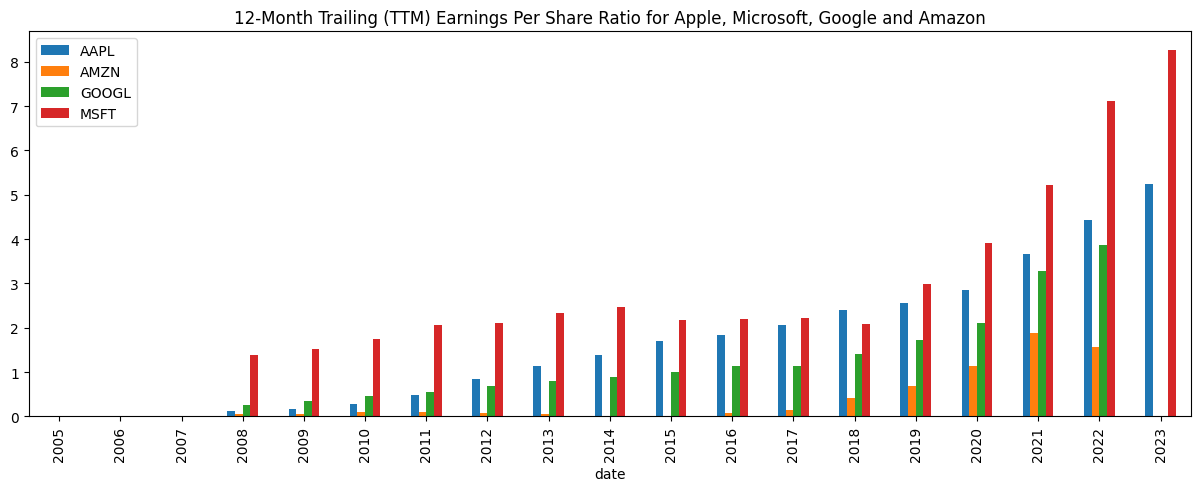

In [27]:
ratios.get_earnings_per_share(trailing=4).T.plot.bar(
    figsize=(15, 5),
    title="12-Month Trailing (TTM) Earnings Per Share Ratio for Apple, Microsoft, Google and Amazon",
)

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Models-Module) to find all the available models.

In [28]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [29]:
models.get_extended_dupont_analysis()

date                            2005   2006   2007   2008   2009   2010  \
AAPL  Interest Burden Ratio   0.9091 0.8705 0.8804 0.9101 0.9592 0.9916   
      Tax Burden Ratio        0.8091 0.8108 0.7929 0.7704 0.7448 0.7622   
      Operating Profit Margin 0.1303 0.1459 0.2086 0.2123 0.2185 0.2842   
      Asset Turnover             NaN 1.3434 1.1283 1.0006 0.7822  1.011   
      Equity Multiplier          NaN 1.6479 1.7357 1.8255  1.912 1.7063   
      Return on Equity           NaN  0.228 0.2852 0.2719 0.2335 0.3706   
AMZN  Interest Burden Ratio   1.0093 1.0318 0.9924 0.9345 0.9724 0.9392   
      Tax Burden Ratio        0.7708 0.4884 0.7267  0.766 0.7989 0.8193   
      Operating Profit Margin 0.0504 0.0352 0.0445  0.047 0.0474 0.0438   
      Asset Turnover             NaN 2.6581 2.7351 2.5902 2.2153 2.0978   
      Equity Multiplier          NaN 11.904 6.6634  3.825 2.7906 2.6904   
      Return on Equity           NaN 0.5613 0.5848 0.3334 0.2275 0.1901   
GOOGL Interest Burden Ratio   0.9419 0.8851 0.8961  1.133 0.9918 0.9616   
      Tax Burden Ratio        0.7264 0.8669 0.8268 0.6373 0.7844 0.8193   
      Operating Profit Margin 0.3489 0.3782 0.3419 0.2686 0.3544 0.3682   
      Asset Turnover             NaN 0.7379 0.7576 0.7634 0.6546 0.5963   
      Equity Multiplier          NaN 1.0864 1.1027 1.1212 1.1249 1.1958   
      Return on Equity           NaN 0.2326 0.2116  0.166  0.203 0.2068   
MSFT  Interest Burden Ratio   0.8757  0.902 0.9215 0.9445 1.0273 0.9634   
      Tax Burden Ratio        0.8416 0.7649 0.7593 0.7861 0.7155 0.7785   
      Operating Profit Margin 0.4179 0.4124 0.3932 0.3941 0.3392 0.4003   
      Asset Turnover             NaN 0.6307 0.7701 0.8888 0.7756  0.762   
      Equity Multiplier          NaN 1.5916 1.8647 2.0178 1.9867 1.9129   
      Return on Equity           NaN 0.2856 0.3951 0.5248 0.3842 0.4376   

date                            2011    2012   2013    2014   2015   2016  \
AAPL  Interest Burden Ratio   0.9879  0.9906 1.0065  0.9817 0.9823 1.0195   
      Tax Burden Ratio        0.7672  0.7555 0.7337  0.7525 0.7496 0.7302   
      Operating Profit Margin  0.316  0.3563 0.2935  0.2926 0.3103 0.2846   
      Asset Turnover          1.1302  1.0704 0.8923  0.8331 0.8949 0.7045   
      Equity Multiplier       1.5397   1.501 1.5845  1.8666 2.2621 2.4724   
      Return on Equity        0.4167  0.4284 0.3064  0.3361 0.4625  0.369   
AMZN  Interest Burden Ratio   0.9229  1.7378 1.7126 -2.4054 1.4444 1.1027   
      Tax Burden Ratio         0.732 -0.0577 0.3678 -1.3539 0.2669 0.5664   
      Operating Profit Margin 0.0194  0.0064 0.0058 -0.0008 0.0144 0.0279   
      Asset Turnover          2.1816  2.1127 2.0478  1.8801 1.7842 1.8272   
      Equity Multiplier       3.0145  3.6261 4.0536  4.6207  4.972 4.5562   
      Return on Equity        0.0863 -0.0049 0.0305 -0.0235 0.0494 0.1452   
GOOGL Interest Burden Ratio   0.9526  0.9532 0.9634  0.9558 0.9852  0.982   
      Tax Burden Ratio        0.8292  0.8415 0.9251  0.8756 0.8444 0.8213   
      Operating Profit Margin 0.3252  0.2668 0.2423  0.2615 0.2621 0.2675   
      Asset Turnover          0.5813  0.6032 0.5845  0.5453 0.5383 0.5732   
      Equity Multiplier       1.2494  1.2812 1.2873  1.2619 1.2391 1.2143   
      Return on Equity        0.1866  0.1654 0.1625  0.1506 0.1454 0.1502   
MSFT  Interest Burden Ratio   0.9676  0.9774 0.9894  0.9978 0.9813 1.0218   
      Tax Burden Ratio        0.8523  0.7801 0.8169  0.7952 0.6714 0.8323   
      Operating Profit Margin 0.4013   0.302 0.3475  0.3204 0.1978 0.2315   
      Asset Turnover           0.718  0.6411 0.5904  0.5516 0.5369 0.4613   
      Equity Multiplier       1.8867   1.863 1.8148  1.8658 2.0522 2.4324   
      Return on Equity        0.4484  0.2751 0.3009  0.2617 0.1436 0.2209   

date                            2017   2018   2019   2020   2021    2022  \
AAPL  Interest Burden Ratio   0.9572 0.9725 0.9725  0.988 0.9976  1.0028   
      Tax Burden Ratio        0.7882 0.8397 0.

Showing the growth is possible with the `growth=True` parameter which also includes a lag parameter in which 1 is the default. It is also possible to define multiple lags. As an example:

In [30]:
models.get_enterprise_value_breakdown(growth=True, lag=[1, 2, 3])

2005   2006   2007    2008    2009  \
AAPL Share Price               Lag 1   NaN 0.1789 1.3346 -0.5683  1.4672   
                               Lag 2   NaN    NaN 1.7523  0.0078   0.065   
                               Lag 3   NaN    NaN    NaN  0.1881  1.4864   
     Market Capitalization     Lag 1   NaN 0.2073 1.3659 -0.5621  1.4805   
                               Lag 2   NaN    NaN 1.8564   0.036  0.0862   
...                                    ...    ...    ...     ...     ...   
MSFT Cash and Cash Equivalents Lag 2   NaN    NaN 0.2597  0.5399 -0.0057   
                               Lag 3   NaN    NaN    NaN  1.1313  -0.095   
     Enterprise Value          Lag 1   NaN 0.1122 0.1414 -0.4954  0.6463   
                               Lag 2   NaN    NaN 0.2695 -0.4241 -0.1693   
                               Lag 3   NaN    NaN    NaN -0.3595 -0.0519   

                                        2010    2011    2012    2013    2014  \
AAPL Share Price               Lag 1  0.5305  0.2556  0.3257  0.0805  0.4059   
                               Lag 2  2.7761  0.9218  0.6646  0.4324   0.519   
                               Lag 3    0.63  3.7413  1.5477  0.7986  1.0138   
     Market Capitalization     Lag 1  0.5604  0.2718  0.3381  0.0648  0.3199   
                               Lag 2  2.8705  0.9846  0.7018  0.4248  0.4055   
...                                      ...     ...     ...     ...     ...   
MSFT Cash and Cash Equivalents Lag 2 -0.4676  0.5816  0.2603 -0.6042  0.2495   
                               Lag 3 -0.0992 -0.0705  0.1419  -0.309 -0.0979   
     Enterprise Value          Lag 1 -0.0692 -0.0707  0.0617  0.4609  0.2615   
                               Lag 2  0.5324  -0.135 -0.0134   0.551  0.8429   
                               Lag 3 -0.2268  0.4241 -0.0816  0.4413  0.9565   

                                        2015    2016   2017    2018   2019  \
AAPL Share Price               Lag 1 -0.0299  0.1246 0.4848 -0.0539 0.8897   
                               Lag 2  0.3638   0.091 0.6699  0.4047 0.7878   
                               Lag 3  0.4736  0.5338 0.6199  0.5798 1.6546   
     Market Capitalization     Lag 1 -0.0821  0.0678 0.4177 -0.0992  0.757   
                               Lag 2  0.2115 -0.0199 0.5138   0.277 0.5826   
...                                      ...     ...    ...     ...    ...   
MSFT Cash and Cash Equivalents Lag 2  0.4708  -0.249 0.3696   0.835 0.4819   
                               Lag 3 -0.1936  0.7114 -0.116  1.1351 0.7444   
     Enterprise Value          Lag 1   0.242  0.1492 0.4027  0.1673 0.5156   
                               Lag 2  0.5668  0.4273  0.612  0.6374 0.7692   
                               Lag 3  1.2889  0.8006 1.0022  0.8817 1.4816   

                                       2020   2021    2022    2023  
AAPL Share Price               Lag 1  0.823 0.3465 -0.2641  0.3654  
                               Lag 2 2.4449 1.4546  -0.009  0.0048  
                               Lag 3 2.2591 3.6385  0.8065   0.353  
     Market Capitalization     Lag 1 0.7183 0.2956 -0.2876  0.3224  
                               Lag 2  2.019 1.2262  -0.077 -0.0579  
...                                     ...    ...     ...     ...  
MSFT Cash and Cash Equivalents Lag 2 0.1364 0.2526  0.0261  1.4398  
                               Lag 3 0.7716 0.1907  0.2268  1.5563  
     Enterprise Value          Lag 1 0.3827 0.4907 -0.2831  0.4438  
                               Lag 2 1.0955 1.0611  0.0686   0.035  
                               Lag 3 1.4461 2.1238  0.4775  0.5429  

[84 rows x 19 columns]

Other than that, there are many other models such as the Altman Z-Score and Piotroski F-Score.

In [31]:
models.get_altman_z_score()

2005    2006    2007    2008  \
AAPL  Working Capital to Total Assets     0.5901  0.4672  0.4993  0.5205   
      Retained Earnings to Total Assets   0.3467  0.3259  0.3591  0.3499   
      EBIT to Total Assets                0.1428  0.1426  0.1739  0.1586   
      Market Value to Total Liabilities  12.8039  8.7449 13.8142  3.5284   
      Sales to Total Assets                1.206  1.1226  0.9471  0.8208   
      Altman Z-Score                     10.5533  7.8569 10.9116  4.5755   
MSFT  Working Capital to Total Assets     0.4499  0.3817  0.2598  0.1835   
      Retained Earnings to Total Assets  -0.1938 -0.2892 -0.4925 -0.3806   
      EBIT to Total Assets                0.2348  0.2624  0.3182  0.3271   
      Market Value to Total Liabilities   8.9074  7.6698  8.0015  3.7458   
      Sales to Total Assets               0.5619  0.6363  0.8093    0.83   
      Altman Z-Score                      6.9497  6.1572  6.2825  3.8444   
GOOGL Working Capital to Total Assets     0.8037  0.6353  0.6021  0.5627   
      Retained Earnings to Total Assets   0.2001  0.2779  0.3684  0.4269   
      EBIT to Total Assets                0.2085  0.2171   0.224  0.1965   
      Market Value to Total Liabilities 142.0944 99.5037 82.6934 27.7139   
      Sales to Total Assets               0.5976  0.5741   0.655  0.6861   
      Altman Z-Score                      87.787 62.1441 52.2485 19.2359   
AMZN  Working Capital to Total Assets     0.2706  0.1928  0.2236  0.1697   
      Retained Earnings to Total Assets  -0.5484  -0.421  -0.212 -0.0878   
      EBIT to Total Assets                0.1407  0.1043  0.1136  0.1158   
      Market Value to Total Liabilities   5.8282  4.2486  7.4248  3.9203   
      Sales to Total Assets               2.2971   2.455  2.2876  2.3053   
      Altman Z-Score                      5.8151  4.9901   7.089  5.1204   

                                           2009    2010    2011   2012  \
AAPL  Working Capital to Total Assets    0.3154  0.2787  0.1462 0.1085   
      Retained Earnings to Total Assets  0.3628  0.4944    0.54 0.5753   
      EBIT to Total Assets               0.1422  0.2445  0.2904 0.3138   
      Market Value to Total Liabilities   6.237  9.2444  8.1008 7.4486   
      Sales to Total Assets              0.6785  0.8675  0.9302 0.8889   
      Altman Z-Score                     5.7764  8.2478  7.6804 7.3291   
MSFT  Working Capital to Total Assets    0.2856  0.3429  0.4245 0.4321   
      Retained Earnings to Total Assets  -0.293 -0.1937 -0.0582 0.0047   
      EBIT to Total Assets               0.2545  0.2922  0.2609 0.1867   
      Market Value to Total Liabilities   5.438  4.8392  3.4425 3.3895   
      Sales to Total Assets              0.7503  0.7256  0.6434 0.6079   
      Altman Z-Score                     4.7853  4.7338  3.9979 3.7829   
GOOGL Working Capital to Total Assets    0.6524  0.5456  0.6041 0.4917   
      Retained Earnings to Total Assets  0.4959  0.4817  0.5182 0.5154   
      EBIT to Total Assets               0.2126  0.1966  0.1706 0.1431   
      Market Value to Total Liabilities 44.1382 16.5496 14.6587 10.654   
      Sales to Total Assets               0.584  0.5068  0.5223 0.5349   
      Altman Z-Score                    29.2457 12.4146  11.331  8.711   
AMZN  Working Capital to Total Assets    0.1761  0.1795  0.1026 0.0705   
      Retained Earnings to Total Assets  0.0125  0.0704  0.0773 0.0589   
      EBIT to Total Assets               0.0861  0.0821   0.039 0.0148   
      Market Value to Total Liabilities  6.9534  6.8784  4.5519 4.6633   
      Sales to Total Assets              1.7743  1.8197  1.9019 1.8766   
      Altman Z-Score                     6.4592  6.5317  4.9933 4.8903   

                                           2013    2014    2015    2016  \
AAPL  Working Capital to Total Assets    0.1431  0.0219  0.0302  0.0866   
      Retained Earnings to Total Assets  0.5037  0.3759  0.3177  0.2996   
      EBIT to Total Assets                0.243  0.2323  0.2522  0.

In [32]:
models.get_piotroski_score()

date                                       2006  2007  2008  2009  2010  2011  \
AAPL  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     0     0     1     0   
      Accruals Criteria                       0     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     0     0   
      Change in Current Ratio Criteria        0     1     1     0     1     0   
      Number of Shares Criteria               0     0     0     0     0     0   
      Gross Margin Criteria                   0     1     1     1     1     1   
      Asset Turnover Criteria                 0     0     0     0     1     1   
      Piotroski Score                         2     5     5     4     7     5   
MSFT  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     1     0     1     0   
      Accruals Criteria                       1     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     1     0   
      Change in Current Ratio Criteria        0     0     0     1     1     1   
      Number of Shares Criteria               0     0     0     0     0     0   
      Gross Margin Criteria                   0     0     1     0     1     0   
      Asset Turnover Criteria                 0     1     1     0     0     0   
      Piotroski Score                         3     4     6     4     7     4   
GOOGL Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     0     1     0     0   
      Accruals Criteria                       0     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     0     1   
      Change in Current Ratio Criteria        0     0     1     1     0     1   
      Number of Shares Criteria               0     0     1     1     1     1   
      Gross Margin Criteria                   1     0     1     1     1     1   
      Asset Turnover Criteria                 0     1     1     0     0     0   
      Piotroski Score                         3     4     7     7     5     7   
AMZN  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     0     0     0     0   
      Accruals Criteria                       1     1     1     1     1     1   
      Change in Leverage Criteria             1     1     1     1     0     0   
      Change in Current Ratio Criteria        0     1     0     1     0     0   
      Number of Shares Criteria               1     1     1     1     1     1   
      Gross Margin Criteria                   0     1     0     1     0     0   
      Asset Turnover Criteria                 0     1     0     0     0     1   
      Piotroski Score                         5     8     5     7     4     5   

date                                       2012  2013  2014  2015  2016  2017  \
AAPL  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     1     1     0     1   
      Accruals Criteria                       1     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     0     0   
      Change in Current Ratio Criteria        0     1     0     1     1     0   
      Number of Shares Criteria               0     0     0     0     0     0   
      Gross Margin Criteria   

# The Performance Module

The Performance module is meant to calculate important performance metrics such as Sharpe Ratio, Sortino Ratio, Treynor Ratio, Information Ratio, Jensen's Alpha, Beta, Capital Asset Pricing Model and more. Find the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs/performance) which includes an explanation about the performance metric, the parameters and an example.

In [33]:
performance = companies.performance

The metrics found here are really about understanding how well a stock (or portfolio) is performing often as opposed to a benchmark (as defined within the Toolkit class, by default this is the S&P 500). It helps in understanding whether the stock is worth the risk and whether it is worth the investment. For example, by looking at Jensen's Alpha.

In [34]:
performance.get_jensens_alpha()

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2005,1.1821,-0.0568,1.106,0.0183
2006,-0.044,0.0249,-0.0927,-0.4177
2007,1.2814,0.158,0.4522,1.2954
2008,-0.2291,-0.1014,-0.232,-0.0279
2009,1.224,0.362,0.7793,1.391
2010,0.3725,-0.2035,-0.1936,0.1747
2011,0.2367,-0.0637,0.0686,-0.0578
2012,0.1312,-0.119,-0.0442,0.2733
2013,-0.1317,0.1532,0.279,0.1884


Jensen's Alpha uses the Capital Asset Pricing Model (CAPM) to calculate whether the stock is outperforming the benchmark. This is also a separate function.

In [35]:
performance.get_capital_asset_pricing_model(show_full_results=True, period="quarterly")

,Risk Free Rate,Beta AAPL,Beta MSFT,Beta GOOGL,Beta AMZN,Benchmark Returns,CAPM AAPL,CAPM MSFT,CAPM GOOGL,CAPM AMZN
Date,,,,,,,,,,
2005Q1,0.045,1.3113,0.592,0.8566,1.2718,-0.0203,-0.0406,0.0063,-0.0109,-0.038
2005Q2,0.0395,2.4479,0.9498,0.8313,0.6253,0.0144,-0.0219,0.0157,0.0186,0.0238
2005Q3,0.0433,1.7729,0.7091,0.0213,2.2254,0.0369,0.032,0.0388,0.0432,0.0291
2005Q4,0.0439,1.2401,0.7698,1.3713,1.4735,0.0173,0.0109,0.0234,0.0074,0.0047
2006Q1,0.0485,2.1749,0.9418,2.4748,1.1589,0.0469,0.045,0.047,0.0445,0.0466
...,...,...,...,...,...,...,...,...,...,...
2022Q4,0.0388,1.4588,1.4666,1.351,1.5229,0.0756,0.0925,0.0928,0.0885,0.0948
2023Q1,0.0349,1.1281,1.2232,1.5442,1.649,0.0746,0.0797,0.0835,0.0962,0.1004
2023Q2,0.0382,1.2118,1.2912,1.0276,1.2033,0.0868,0.0971,0.1009,0.0881,0.0967


**The beauty of this class is that you can view the performance metrics on a weekly, monthly, quarterly or yearly interval.** Here, if for example the variance needs to be calculated, it intelligently calculates the variance for the days within each week, month, quarter or year. This is also the case for the standard deviation and other metrics. E.g. you can view the 12-month rolling Sharpe Ratio as follows:

<Axes: title={'center': '12-Month Rolling Sharpe Ratio'}, xlabel='Date'>

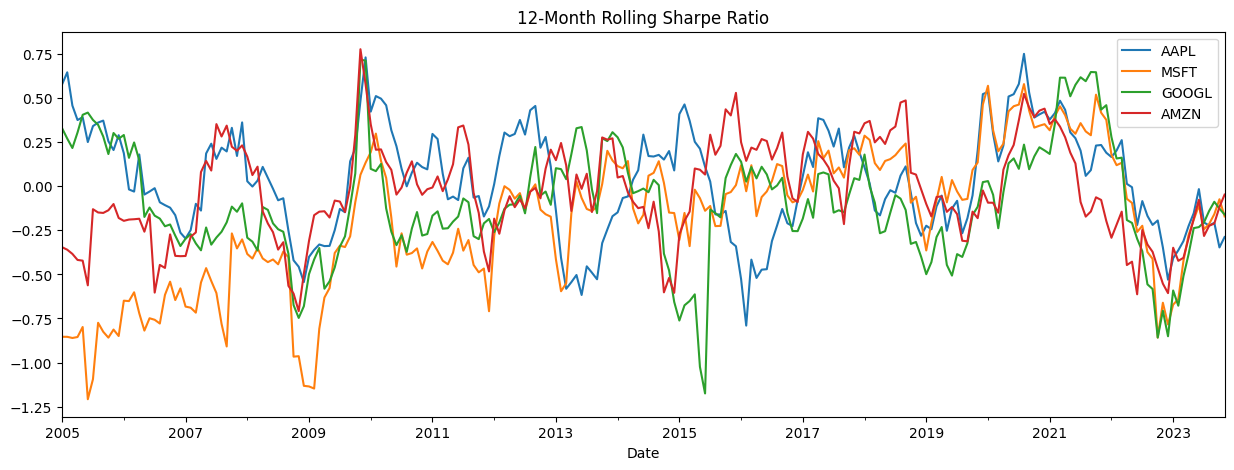

In [36]:
performance.get_sharpe_ratio(period="monthly", rolling=12).plot(
    figsize=(15, 5), title="12-Month Rolling Sharpe Ratio"
)

With the various already prepared period datasets, it also becomes possible to calculate Factor Exposures via the Fama and French 5 Factor Model over a lengthy period. This performs a Linear Regression on each stock for each period and determines the regression parameters. With this you can determine how the stock returns move according to different anomalies in the market. These factors are:

- **Market Risk Premium (Mkt-RF):** Represents the additional return that investors expect to earn for taking on the risk of investing in the overall market as opposed to a risk-free asset. This relates to CAPM's Beta but is a more generalized approach in which CAPM calculates based on a benchmark of your choosing.
- **Size Premium (SMB):** Reflects the historical excess return of small-cap stocks over large-cap stocks.
- **Value Premium (HML):** Captures the historical excess return of value stocks over growth stocks.
- **Profitability (RMW):** Measures the historical excess return of high profitability stocks over low profitability stocks.
- **Investment (CMA):** Quantifies the historical excess return of low investment stocks over high investment stocks.

**It is possible to do a Simple Linear Regression for each factor and a Multi Linear Regression for all factors with the dependent variable being the stock returns. The latter is the default.**

In [37]:
fama_and_french = performance.get_fama_and_french_model(
    period="yearly", method="simple"
)

# Show the Fama and French 5 Factor Model Results
fama_and_french

Calculating Individual Factor Exposures: 100%|██████████| 4/4 [00:43<00:00, 10.90s/it]


AAPL                                                        \
        Mkt-RF                                                         
     Intercept   Slope R Squared P Value Standard Error Factor Value   
2005    0.1154 12.4125    0.2156     0.0         1.4974         -0.5   
2006    0.2461 11.6141    0.1772     0.0         1.5862        -0.51   
2007     0.309 20.7463    0.2523     0.0         2.2634        -0.65   
2008    0.2588 46.5849    0.4656     0.0           3.15          1.7   
2009   -0.0816  57.284    0.5031     0.0         3.6004        -0.99   
2010    0.0176 48.7835    0.5039     0.0         3.0612         -0.1   
2011   -0.0472 62.9066    0.4642     0.0         4.2748         -0.4   
2012     0.034 24.1591    0.2936     0.0         2.3798         1.71   
2013    0.1175  9.6628     0.059  0.0001         2.4412         0.44   
2014    0.0128 23.5511    0.1829     0.0         3.1485        -0.93   
2015    0.0045  37.887     0.434     0.0         2.7365        -0.92   
2016    0.0619  32.827    0.3107     0.0         3.0921        -0.52   
2017    0.1101 19.6318    0.2328     0.0         2.2586        -0.57   
2018    0.2971 44.3348    0.5562     0.0         2.5098          0.9   
2019    0.3113 36.2734    0.5326     0.0         2.1491         0.28   
2020    0.0322 60.4153    0.6825     0.0         2.6007         0.39   
2021    0.0387 37.3782    0.4468     0.0         2.6305        -0.31   
2022    0.2991 57.7373    0.7101     0.0         2.3379        -0.22   
2023    0.8247 46.2722    0.5136     0.0         3.5059        -0.08   

                                            ...           AMZN               \
                     SMB                    ...            RMW                
     Residuals Intercept   Slope R Squared  ... Standard Error Factor Value   
2005    7.3242    0.0392  4.9292     0.079  ...         0.7962        -0.09   
2006     5.856    0.0819  4.1755    0.0401  ...         0.5833        -0.11   
2007   14.5107   -0.0225  0.6107    0.0012  ...         0.4285         -0.3   
2008  -80.0215    0.0179 -0.1857    0.0001  ...         0.8944        -0.67   
2009     58.26   -0.0022  9.7592    0.0797  ...         0.8657        -0.47   
2010    5.3913    0.0337 14.0494    0.1646  ...         1.0272        -0.12   
2011   25.4654   -0.0289 16.5328    0.1749  ...         1.2113        -0.04   
2012  -41.0203   -0.0037  3.3344    0.0212  ...         0.9365         0.12   
2013   -4.2886    0.0234  3.0417    0.0195  ...         0.8884        -0.04   
2014   22.2956   -0.0307  2.8711    0.0052  ...         0.9374        -0.13   
2015   34.8217   -0.0228 -3.8464     0.018  ...         0.8845        -0.11   
2016   17.1327    0.0349  4.7364    0.0156  ...         1.3106        -0.11   
2017   11.5648   -0.0174  0.7444    0.0003  ...         1.4035         0.17   
2018  -40.2523   -0.0351 -1.8535    0.0043  ...         0.9876        -0.09   
2019   -9.5782    0.0023  3.4847    0.0135  ...         1.4108        -0.12   
2020  -22.7712     0.027 -3.6505    0.0102  ...         1.4982         0.57   
2021   11.8951    0.0045 -3.2329    0.0034  ...         3.0221         0.36   
2022    12.139    0.0065  1.4501    0.0034  ...          1.556        -0.54   
2023    3.2425   -0.0065   1.328    0.0008  ...         1.7177         0.04   

                                                                    \
                     CMA                                             
     Residuals Intercept    Slope R Squared P Value Standard Error   
2005    -0.015   -0.0271  -0.7629    0.0101  0.1119         0.4782   
2006   -0.3122    0.0165  -0.7092    0.0073  0.1758         0.5223   
2007    1.4264   -0.0458  -1.1812    0.0258  0.0109         0.4603   
2008   -2.2009   -0.0046  -2.7239    0.0719     0.0         0.6179   
2009    0.6686    0.0052  -2.2262    0.0559  0.0002         0.5786   
2010   -0.4262    0.0319   3.3119    0.0591  0.0001         0.8354   
2011   -0.3764   -0.0058  -2.6698    0.0565  0.0001     

With these calculated, it is possible to plot the R-squared over time to show the explanatory power of each factor for each stock.

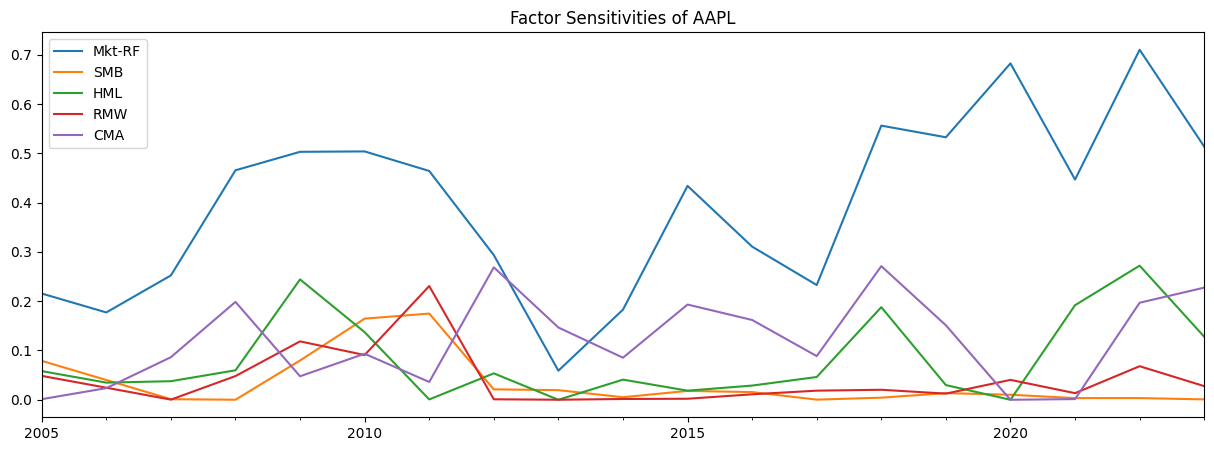

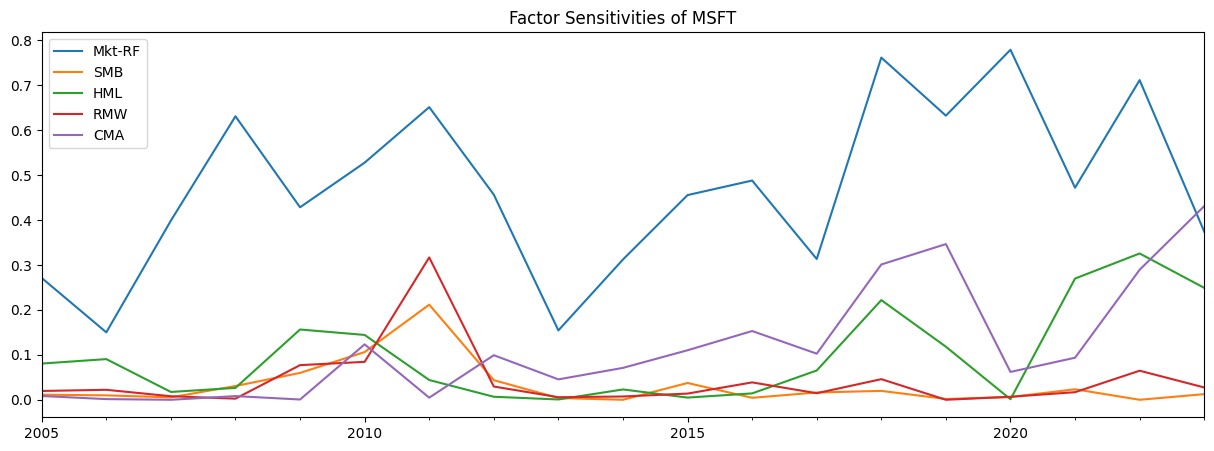

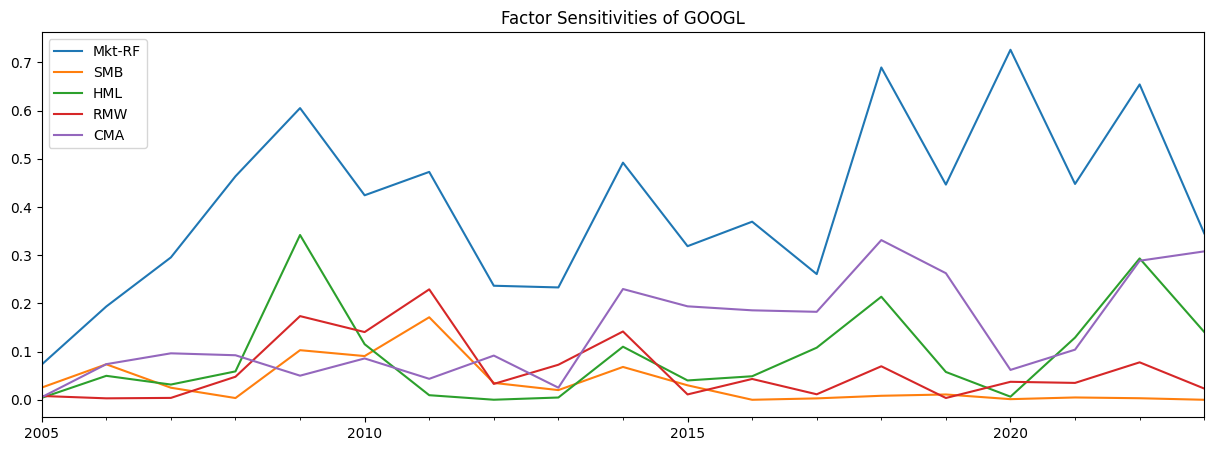

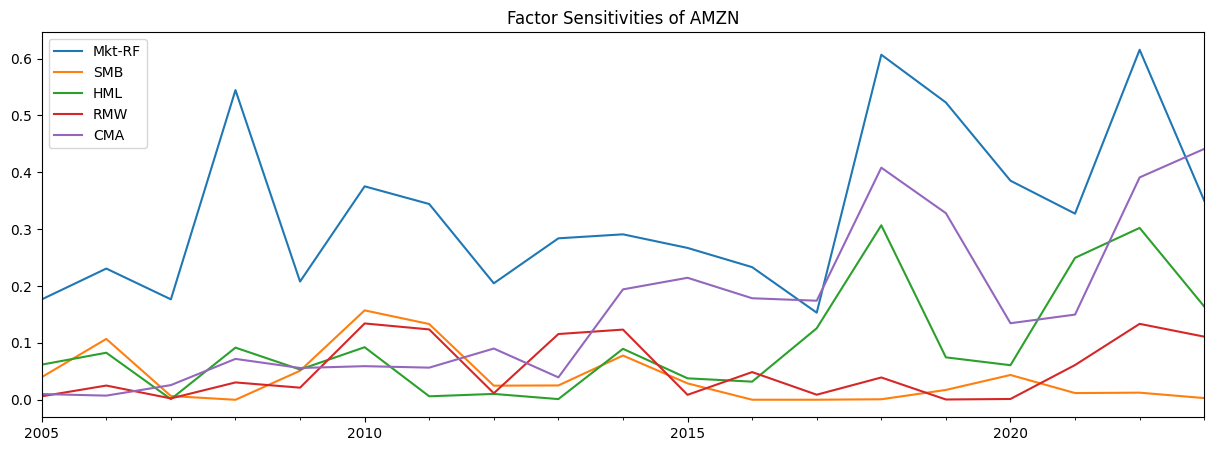

In [38]:
for ticker in companies._tickers:
    fama_and_french[ticker].xs("R Squared", level=1, axis=1).plot(
        figsize=(15, 5), title=f"Factor Sensitivities of {ticker}"
    )

Correlations between factors and factors and asset returns can also be shown with `performance.get_factor_correlations` and `performance.get_factor_asset_correlations` respectively.

In [39]:
performance.get_factor_asset_correlations(period="quarterly")

Calculating Factor Asset Correlations: 100%|██████████| 4/4 [00:14<00:00,  3.62s/it]


AAPL                                   MSFT                          \
       Mkt-RF     SMB     HML     RMW     CMA Mkt-RF     SMB     HML     RMW   
2005Q1  0.345  0.1807 -0.2203 -0.3058  0.0459 0.5637 -0.0627 -0.4052 -0.0741   
2005Q2 0.6597  0.4352 -0.1307  -0.288  0.0971 0.6234  0.1732 -0.4109 -0.1065   
2005Q3  0.462  0.2122 -0.4456 -0.1215 -0.1176 0.4069  0.0099 -0.3959  -0.404   
2005Q4 0.3793  0.3182 -0.3237 -0.1933 -0.2682 0.5836  0.2966  0.0244  0.0067   
2006Q1 0.4988 -0.0061  -0.156 -0.2826 -0.1777 0.5477 -0.0147 -0.3744 -0.3212   
...       ...     ...     ...     ...     ...    ...     ...     ...     ...   
2022Q3 0.8092  0.1528 -0.5046 -0.1997 -0.5231 0.8615   0.097 -0.5451 -0.2308   
2022Q4 0.8998  0.2309 -0.5968 -0.1868 -0.5946 0.8964  0.1329 -0.5628 -0.1455   
2023Q1 0.7737  0.1606 -0.3775  -0.228 -0.5707 0.6644 -0.0049 -0.5674 -0.2747   
2023Q2 0.7416 -0.1166 -0.2722  0.0093 -0.4745 0.5394 -0.1627 -0.4535 -0.0928   
2023Q3 0.6122  0.0435 -0.3534 -0.2867 -0.2633 0.6238  -0.237 -0.3416 -0.0382   

                GOOGL                                   AMZN                  \
           CMA Mkt-RF     SMB     HML     RMW     CMA Mkt-RF     SMB     HML   
2005Q1 -0.0395 0.2657  0.2516 -0.1182 -0.2358  0.2235 0.3671  0.1221  -0.288   
2005Q2 -0.0642  0.274  0.0887  0.0514  0.0468 -0.1864 0.4211  0.2935 -0.0331   
2005Q3 -0.1037 0.0663  0.0327  -0.334 -0.2586 -0.0515 0.5178  0.1923 -0.4229   
2005Q4 -0.2314 0.4093  0.2036  0.0544  0.0337 -0.3569 0.4409  0.2363 -0.2213   
2006Q1 -0.2735 0.5654  0.2607 -0.0397 -0.0049 -0.3212 0.4332  0.0772 -0.0855   
...        ...    ...     ...     ...     ...     ...    ...     ...     ...   
2022Q3 -0.6176 0.8679  0.3017 -0.6207 -0.3682 -0.6782 0.8544   0.218 -0.5326   
2022Q4 -0.5949 0.8051  0.1381 -0.5822 -0.1097 -0.5855 0.7924  0.2857 -0.6564   
2023Q1 -0.6795 0.6731  0.2035 -0.4906 -0.2213 -0.6536  0.723  0.2762 -0.5258   
2023Q2 -0.5736 0.4262  -0.186 -0.3573 -0.0042 -0.4747 0.4432 -0.1173   -0.46   
2023Q3 -0.7846 0.5628 -0.1374 -0.0545 -0.2353 -0.3874 0.4759 -0.0384   0.037   

                        
           RMW     CMA  
2005Q1 -0.2356   0.145  
2005Q2  -0.206 -0.0803  
2005Q3 -0.0196 -0.2031  
2005Q4  0.1255 -0.3436  
2006Q1 -0.1007 -0.0968  
...        ...     ...  
2022Q3   -0.34 -0.7097  
2022Q4 -0.3434 -0.7933  
2023Q1 -0.4452 -0.7295  
2023Q2  -0.192 -0.5917  
2023Q3 -0.3418 -0.6273  

[75 rows x 20 columns]

# The Risk Module

The Risk module is meant to calculate important risk metrics such as Value at Risk (VaR), Conditional Value at Risk (cVaR), Maximum Drawdown, Correlations, Beta, GARCH, EWMA and more. Find the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs/risk) which includes an explanation about the risk metrics, the parameters and an example.

In [40]:
risk = companies.risk

An important measurement is that of Value at Risk (VaR) and Conditional Value at Risk (cVaR) in which the former is the maximum loss that can be expected with a certain probability (e.g. 95%) and the latter is the expected loss given that the loss is greater than the VaR. Understanding the potential tail risk you take is crucial for any investment.

The conditional Value at Risk can be explained as the expected loss on a day within the chosen period.

In [41]:
risk.get_conditional_value_at_risk(period="weekly")

,AAPL,MSFT,GOOGL,AMZN,Benchmark
2003-12-29/2004-01-04,NaN,NaN,NaN,NaN,NaN
2004-01-05/2004-01-11,-0.0154,-0.0181,NaN,-0.0346,-0.0088
2004-01-12/2004-01-18,-0.0558,-0.0058,NaN,-0.0071,-0.0059
2004-01-19/2004-01-25,-0.019,-0.0107,NaN,-0.0071,-0.0033
2004-01-26/2004-02-01,-0.0238,-0.0194,NaN,-0.0681,-0.0115
...,...,...,...,...,...
2023-10-02/2023-10-08,-0.0078,-0.0261,-0.013,-0.0366,-0.0134
2023-10-09/2023-10-15,-0.0103,-0.0104,-0.0116,-0.0192,-0.0061
2023-10-16/2023-10-22,-0.0147,-0.014,-0.0156,-0.0254,-0.0133
2023-10-23/2023-10-29,-0.0246,-0.0375,-0.0951,-0.0558,-0.0144


Or find the Maximum Drawdown that can occur in a given period.

<Axes: title={'center': 'Maximum Drawdown'}>

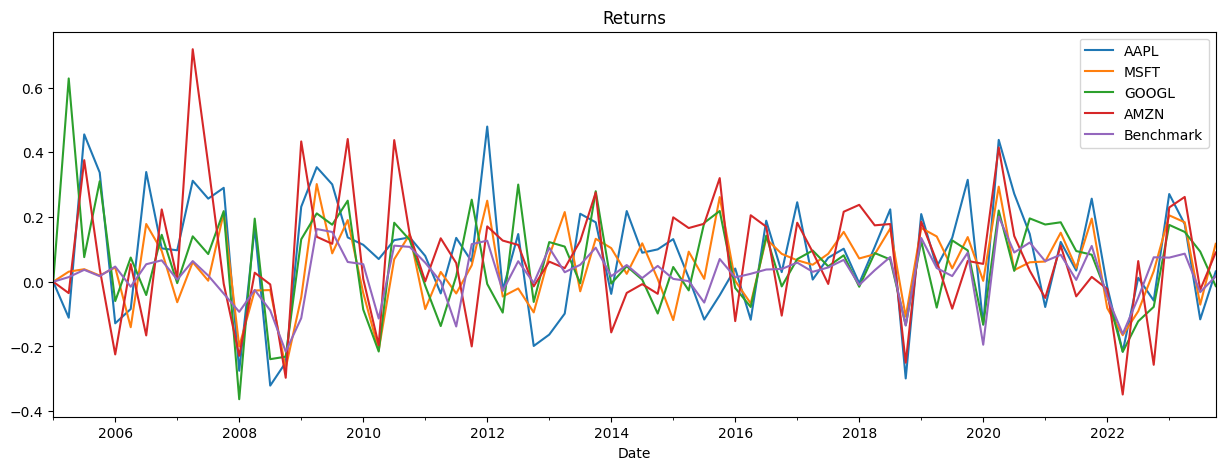

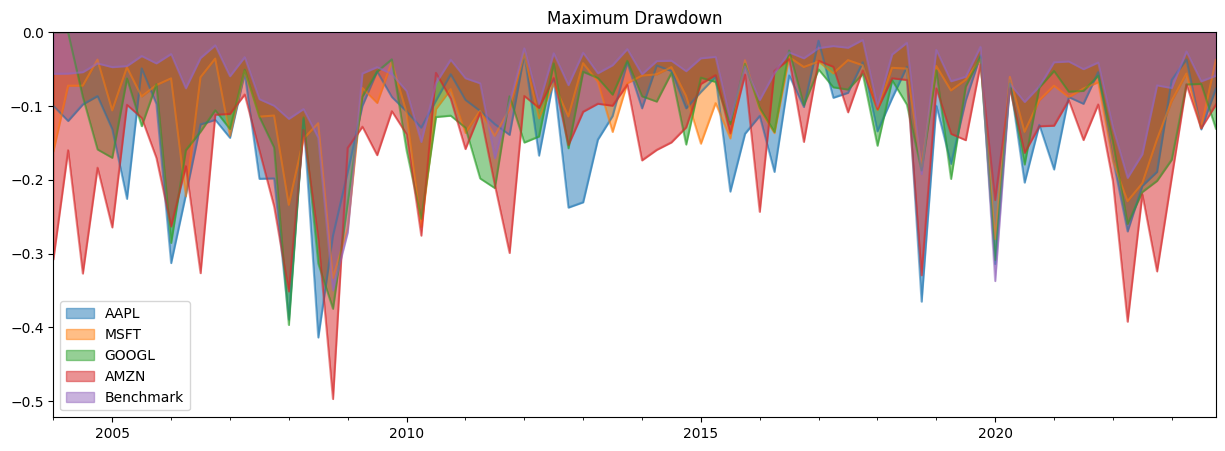

In [42]:
companies.get_historical_data(period="quarterly")["Return"].plot(
    figsize=(15, 5), title="Returns"
)
risk.get_maximum_drawdown(period="quarterly").plot.area(
    stacked=False, figsize=(15, 5), title="Maximum Drawdown"
)

# The Technicals Module

After initialization of `Toolkit`, you can get access to the Technicals module which includes a variety of well-known technical indicators. This can be done by calling the `technicals` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Technical-Module) to find all the available indicators.

In [43]:
technicals = companies.technicals

Some of the technical indicators you can find here are for example a collection of breadth indicators.

In [44]:
technicals.collect_breadth_indicators()

McClellan Oscillator                        Advancers - Decliners  \
                           AAPL   MSFT   GOOGL    AMZN                  AAPL   
Date                                                                           
2005-01-03               0.0432 0.3346  0.2439  0.1102                0.9593   
2005-01-04               0.0412 0.3181  0.2423  0.1108                0.9691   
2005-01-05               0.0397 0.3005  0.2382  0.1098                0.9776   
2005-01-06               0.0382 0.2829  0.2274  0.1064                0.9784   
2005-01-07               0.0404 0.2634  0.2237  0.1064                  1.05   
...                         ...    ...     ...     ...                   ...   
2023-10-30              -2.0349 1.6298 -0.6916 -0.0334                170.29   
2023-10-31              -2.0706 1.9652 -1.0662  0.3327                170.77   
2023-11-01              -1.9308 2.6401 -1.2626  0.8396                173.97   
2023-11-02              -1.6217 3.3165 -1.3722  1.3222                177.57   
2023-11-03              -1.3952 4.1022 -1.3786  1.7548                176.65   

                                On-Balance Volume                            \
             MSFT  GOOGL   AMZN              AAPL        MSFT         GOOGL   
Date                                                                          
2005-01-03  18.73   5.07   2.23     31450871760.0 346797000.0  6334415244.0   
2005-01-04   18.8   4.87   2.11     32548065088.0 456239100.0  5784729480.0   
2005-01-05  18.76   4.84   2.09     33228794144.0 383775600.0  5455594944.0   
2005-01-06  18.74   4.72   2.05     33932936128.0 306885100.0  5040526428.0   
2005-01-07  18.68   4.85   2.12     36167889856.0 238161800.0  5426655912.0   
...           ...    ...    ...               ...         ...           ...   
2023-10-30 337.31 124.46 132.71    106382996499.0 747462775.0 28939082910.0   
2023-10-31 338.11 124.08 133.09    106427842516.0 767728057.0 28912790568.0   
2023-11-01 346.07 126.45  137.0    106484777422.0 795886876.0 28942873006.0   
2023-11-02 348.32 127.49 138.07    106562069474.0 820234948.0 28969997653.0   
2023-11-03  352.8  129.1  138.6    106483011022.0 843858272.0 28996256186.0   

                         Accumulation/Distribution Line                     \
                    AMZN                           AAPL               MSFT   
Date                                                                         
2005-01-03  -215420000.0            -1226166441378.2983 -881736783439.4427   
2005-01-04  -603790000.0             -1234909546956.128 -885756293293.9882   
2005-01-05  -770874000.0            -1246163843218.4082 -889238803852.8116   
2005-01-06  -944892000.0            -1254483705242.1245  -892208241733.764   
2005-01-07  -748160000.0            -1262173896198.2852  -896318913196.727   
...                  ...                            ...                ...   
2023-10-30 18798614395.0             -22833335929844.04 -5529356915006.089   
2023-10-31 18850203775.0            -22833294970481.848 -5529345019144.497   
2023-11-01 18911733184.0             -22833245239018.94 -5529326645243.296   
2023-11-02 18963969877.0            -22833181939493.598 -5529308414174.606   
2023-11-03 19007974464.0             -22833110627402.89 -5529295431384.646   

                                             Chaikin Oscillator  \
                      GOOGL             AMZN               AAPL   
Date                                                              
2005-01-03 -1226585795.6399 -1535398373.5029  -25022408722.8323   
2005-01-04 -1638850118.6399 -1632490873.5029  -25169831853.6016   
2005-01-05 -1803417386.6399 -1743880206.8362  -26522887231.1326   
2005-01-06 -2135472199.4399 -1917898206.8362  -27312467144.8384   
2005-01-07  -1804504070.297 -1777375349.6934  -27599404491.5112   
...                     ...              ...                ...   
2023-10-30  9926473711.1408 32516594869.6599     -15747981.2891   
2023-10-31   9927501

But individual indicators are also available such as the Relative Strength Indicator (RSI) and plot accordingly.

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2005-01-03,42.6515,28.0488,81.746,70.6897
2005-01-04,43.9953,34.0909,65.873,56.7164
2005-01-05,46.7562,36.1446,63.4921,53.0303
2005-01-06,40.0504,32.0988,61.5385,53.8462
2005-01-07,65.7908,35.6164,62.6866,58.3333
...,...,...,...,...
2023-10-30,30.3969,57.6606,30.1749,53.8831
2023-10-31,27.1161,55.1737,24.4175,51.5901
2023-11-01,34.6957,62.0846,31.0188,55.4264


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

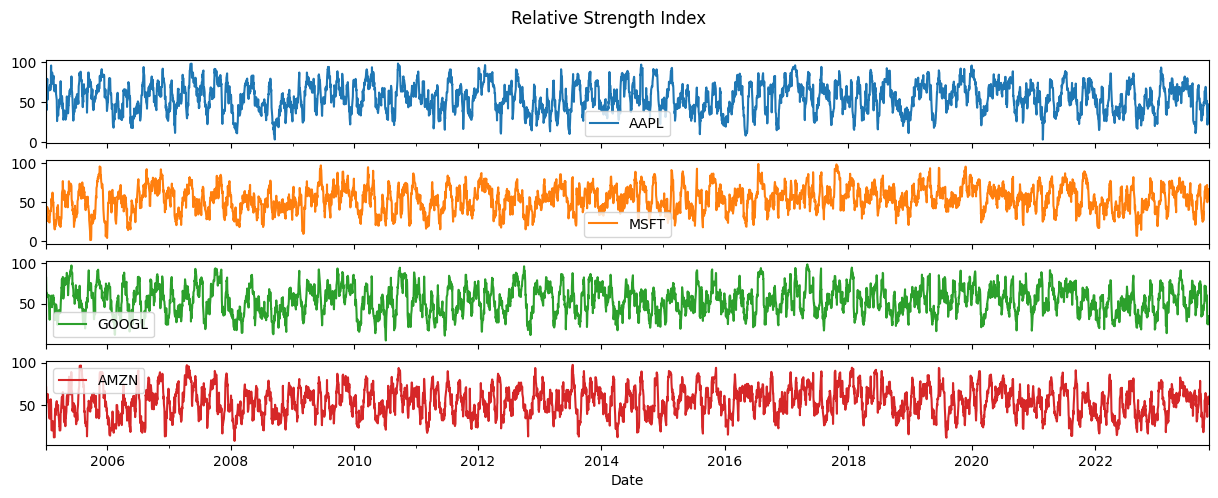

In [45]:
# Obtain the Relative Strength Index (RSI) for each company
rsi = technicals.get_relative_strength_index()

# Show the RSI for each company
display(rsi)

# Plot the RSI for each company
rsi.plot(subplots=True, figsize=(15, 5), title="Relative Strength Index")

Each functionality also has the ability to change parameters. As an example, the window for the Average Directional Index can be changed and the growth and lag can also be defined.

In [46]:
technicals.get_average_directional_index(window=20, growth=True, lag=[5, 10])

AAPL            MSFT          GOOGL           AMZN        
             Lag 5  Lag 10   Lag 5  Lag 10  Lag 5 Lag 10   Lag 5  Lag 10
Date                                                                    
2005-01-03     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN
2005-01-04     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN
2005-01-05     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN
2005-01-06     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN
2005-01-07     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN
...            ...     ...     ...     ...    ...    ...     ...     ...
2023-10-30 -0.3431 -0.3516 -0.0814 -0.1014 0.1214 0.2224 -0.1489 -0.0614
2023-10-31 -0.4023 -0.4357 -0.1036 -0.1137 0.0539 0.4514 -0.1652 -0.1345
2023-11-01 -0.4272 -0.5017 -0.1273 -0.1386 0.1715 0.5774 -0.1737 -0.1913
2023-11-02 -0.4053 -0.5132 -0.0993 -0.1575 0.1547 0.4094 -0.1726 -0.2007
2023-11-03 -0.3352 -0.5027 -0.0498 -0.1213  0.176  0.403 -0.1363 -0.2135

[4743 rows x 8 columns]